In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Energy_LineApril2022to2024.csv')

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['Driver_ID', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]

# Filter the dataset to include only these drivers
filtered_driver_ids = filtered_trip_counts['Driver_ID']
filtered_df = df[df['si_siv_ndriver_def'].isin(filtered_driver_ids)]

# Display the first few rows of the dataframe to understand its structure
print(df.head())

    ut                start_date                  end_date current_station  \
0  927  2023-01-01T01:01:41.000Z  2023-01-01T01:03:05.000Z        Uribarri   
1  927  2023-01-01T01:05:37.000Z  2023-01-01T01:07:03.000Z   Zurbaranbarri   
2  927  2023-01-01T01:13:33.000Z  2023-01-01T01:15:19.000Z       Kukullaga   
3  927  2023-01-01T01:15:50.000Z  2023-01-01T01:16:55.000Z      Otxarkoaga   
4  927  2023-01-01T01:23:19.000Z  2023-01-01T10:49:22.000Z        Uribarri   

  next_station  current_station_code  next_station_code      client_line  \
0  Casco Viejo                   216                215         L3 Txori   
1   Txurdinaga                   214                213  Bilbao-Donostia   
2   Otxarkoaga                   211                212  Bilbao-Donostia   
3   Txurdinaga                   212                213  Bilbao-Donostia   
4       Matiko                   216                217         L3 Txori   

   track  tiempo_marcha  ...  regenerated_traction_energy  \
0      2     

Number of drivers with between 1,000 and 33,000 trips: 288


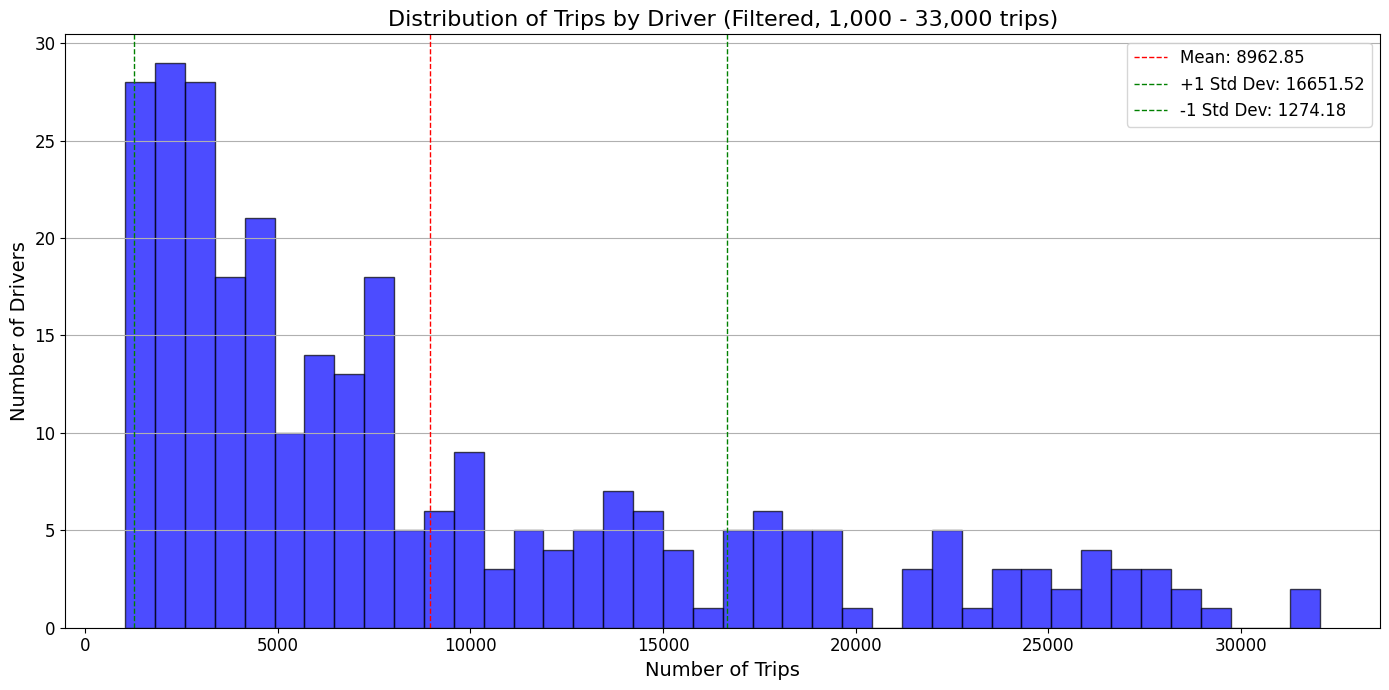

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Energy_LineApril2022to2024.csv')

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['Driver_ID', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]

# Calculate the mean and standard deviation of trips per driver
mean_trips_per_driver = filtered_trip_counts['Trip_Count'].mean()
std_trips_per_driver = filtered_trip_counts['Trip_Count'].std()

# Determine the number of drivers who fit this requirement
num_drivers = filtered_trip_counts.shape[0]

# Print the number of drivers
print(f"Number of drivers with between 1,000 and 33,000 trips: {num_drivers}")

# Plot the histogram of trip counts
plt.figure(figsize=(14, 7))
plt.hist(filtered_trip_counts['Trip_Count'], bins=40, edgecolor='black', color='blue', alpha=0.7)
plt.axvline(mean_trips_per_driver, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_trips_per_driver:.2f}')
plt.axvline(mean_trips_per_driver + std_trips_per_driver, color='green', linestyle='dashed', linewidth=1, label=f'+1 Std Dev: {mean_trips_per_driver + std_trips_per_driver:.2f}')
plt.axvline(mean_trips_per_driver - std_trips_per_driver, color='green', linestyle='dashed', linewidth=1, label=f'-1 Std Dev: {mean_trips_per_driver - std_trips_per_driver:.2f}')
plt.title('Distribution of Trips by Driver (Filtered, 1,000 - 33,000 trips)', fontsize=16)
plt.xlabel('Number of Trips', fontsize=14)
plt.ylabel('Number of Drivers', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [3]:
# Calculate energy consumed per kilometer and per trip for each driver
filtered_df['energy_per_km'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df['kilometres']
filtered_df['energy_per_trip'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df.groupby('si_siv_ndriver_def')['ut'].transform('size')

# Group by driver and calculate mean energy efficiency ratios
driver_efficiency_stats = filtered_df.groupby('si_siv_ndriver_def').agg({
    'energy_per_km': 'mean',
    'energy_per_trip': 'mean',
    'si_siv_ndriver_def': 'size'  # This will count the number of trips
}).rename(columns={'si_siv_ndriver_def': 'trip_count'}).reset_index()

# Rank by energy efficiency (energy_per_km and energy_per_trip)
driver_efficiency_stats = driver_efficiency_stats.sort_values(by=['energy_per_km', 'energy_per_trip'], ascending=True).reset_index(drop=True)

# Display the energy efficiency ratios and trip counts
print("Ranked Energy Efficiency Ratios with Trip Counts (Filtered Drivers):")
print(driver_efficiency_stats)


Ranked Energy Efficiency Ratios with Trip Counts (Filtered Drivers):
    si_siv_ndriver_def  energy_per_km  energy_per_trip  trip_count
0                 2854       4.727528         0.001134       10038
1                 2254       4.756273         0.000766        9344
2                 3374       4.759907         0.000954        8005
3                 3118       4.796844         0.001257        5739
4                 3256       4.799541         0.001567        4680
..                 ...            ...              ...         ...
283               2293       6.634687         0.005453        2028
284               3112       6.695659         0.003371        3163
285               2683       6.705552         0.002028        5069
286               2222       6.764786         0.006709        1550
287               2260       6.890403         0.006923        1041

[288 rows x 4 columns]


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Energy_LineApril2022to2024.csv')

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['si_siv_ndriver_def', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]

# Filter the dataset to include only these drivers
filtered_driver_ids = filtered_trip_counts['si_siv_ndriver_def']
filtered_df = df[df['si_siv_ndriver_def'].isin(filtered_driver_ids)]

# Define the selected energy columns for analysis
selected_energy_columns = [
    'net_energy_consumed_by_UT', 'auxiliary_energy_consumed', 'traction_energy', 
    'regenerated_traction_energy'
]

# Group by driver and calculate variance for each selected energy metric
driver_energy_variance = filtered_df.groupby('si_siv_ndriver_def')[selected_energy_columns].var().reset_index()

# Calculate the total variance across all selected energy metrics
driver_energy_variance['total_variance'] = driver_energy_variance[selected_energy_columns].sum(axis=1)

# Merge the variance data with the trip counts
driver_variance_with_trips = pd.merge(driver_energy_variance, filtered_trip_counts, on='si_siv_ndriver_def')

# Rank by total variance
driver_variance_with_trips = driver_variance_with_trips.sort_values(by='total_variance', ascending=True).reset_index(drop=True)

# Display the variance analysis with trip counts
print("Ranked Variance Analysis with Trip Counts (Filtered Drivers):")
print(driver_variance_with_trips[['si_siv_ndriver_def', 'total_variance', 'Trip_Count'] + selected_energy_columns])


Ranked Variance Analysis with Trip Counts (Filtered Drivers):
    si_siv_ndriver_def  total_variance  Trip_Count  net_energy_consumed_by_UT  \
0                 2260       64.152705        1041                  31.121928   
1                 2224       66.043510        1155                  32.157721   
2                   28       68.462387        1361                  33.723768   
3                  284       69.706385        1118                  34.270158   
4                 3230       73.084587       23664                  35.588082   
..                 ...             ...         ...                        ...   
283               3291      398.741158        1683                 200.508603   
284               3123      403.236945        4656                 198.770384   
285               3470      411.262958        9646                 203.414160   
286               3098      454.338059        1286                 219.048428   
287               3234      479.298789        2

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('Energy_LineApril2022to2024.csv')

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['si_siv_ndriver_def', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]

# Filter the dataset to include only these drivers
filtered_driver_ids = filtered_trip_counts['si_siv_ndriver_def']
filtered_df = df[df['si_siv_ndriver_def'].isin(filtered_driver_ids)].copy()

# Define the selected energy columns for analysis
selected_energy_columns = [
    'net_energy_consumed_by_UT', 'auxiliary_energy_consumed', 'traction_energy', 
    'regenerated_traction_energy'
]

# Calculate energy consumed per kilometer and per trip for each driver
filtered_df.loc[:, 'energy_per_km'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df['kilometres']
filtered_df.loc[:, 'energy_per_trip'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df.groupby('si_siv_ndriver_def')['ut'].transform('size')

# Group by driver and calculate mean energy efficiency ratios
driver_efficiency_stats = filtered_df.groupby('si_siv_ndriver_def').agg({
    'energy_per_km': 'mean',
    'energy_per_trip': 'mean'
}).reset_index()

# Group by driver and calculate variance for each selected energy metric
driver_energy_variance = filtered_df.groupby('si_siv_ndriver_def')[selected_energy_columns].var().reset_index()

# Calculate the total variance across all selected energy metrics
driver_energy_variance['total_variance'] = driver_energy_variance[selected_energy_columns].sum(axis=1)

# Merge the efficiency stats and variance data with the trip counts
driver_stats = pd.merge(driver_efficiency_stats, driver_energy_variance, on='si_siv_ndriver_def')
driver_stats = pd.merge(driver_stats, filtered_trip_counts, on='si_siv_ndriver_def')

# Normalize the energy efficiency ratios and total variance
scaler = MinMaxScaler()
driver_stats[['energy_per_km', 'energy_per_trip', 'total_variance']] = scaler.fit_transform(
    driver_stats[['energy_per_km', 'energy_per_trip', 'total_variance']]
)

# Combine the normalized scores into a composite score
driver_stats['composite_score'] = driver_stats['energy_per_km'] + driver_stats['energy_per_trip'] - driver_stats['total_variance']

# Rank drivers based on the composite score
driver_stats = driver_stats.sort_values(by='composite_score', ascending=True).reset_index(drop=True)

# Display the ranked drivers
print("Ranked Drivers Based on Energy Efficiency Ratios and Variance:")
print(driver_stats[['si_siv_ndriver_def', 'composite_score', 'Trip_Count', 'energy_per_km', 'energy_per_trip', 'total_variance']])


Ranked Drivers Based on Energy Efficiency Ratios and Variance:
    si_siv_ndriver_def  composite_score  Trip_Count  energy_per_km  \
0                 3320        -0.373007       11857       0.221574   
1                 2890        -0.370783       12203       0.223044   
2                 3475        -0.365990       12406       0.282275   
3                 2854        -0.324189       10038       0.000000   
4                 3670        -0.319406       11681       0.266859   
..                 ...              ...         ...            ...   
283               2086         1.103662        1356       0.687934   
284               2293         1.107855        2028       0.881770   
285               2754         1.122402        1396       0.729816   
286               2222         1.280220        1550       0.941922   
287               2260         1.566846        1041       1.000000   

     energy_per_trip  total_variance  
0           0.064751        0.659332  
1           0.0650

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('Energy_LineApril2022to2024.csv')

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['si_siv_ndriver_def', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]

# Filter the dataset to include only these drivers
filtered_driver_ids = filtered_trip_counts['si_siv_ndriver_def']
filtered_df = df[df['si_siv_ndriver_def'].isin(filtered_driver_ids)].copy()

# Define the selected energy columns for analysis
selected_energy_columns = [
    'net_energy_consumed_by_UT', 'auxiliary_energy_consumed', 'traction_energy', 
    'regenerated_traction_energy'
]

# Calculate energy consumed per kilometer and per trip for each driver
filtered_df['energy_per_km'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df['kilometres']
filtered_df['energy_per_trip'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df.groupby('si_siv_ndriver_def')['ut'].transform('size')

# Group by driver and calculate mean energy efficiency ratios
driver_efficiency_stats = filtered_df.groupby('si_siv_ndriver_def').agg({
    'energy_per_km': 'mean',
    'energy_per_trip': 'mean'
}).reset_index()

# Group by driver and calculate variance for each selected energy metric
driver_energy_variance = filtered_df.groupby('si_siv_ndriver_def')[selected_energy_columns].var().reset_index()

# Calculate the total variance across all selected energy metrics
driver_energy_variance['total_variance'] = driver_energy_variance[selected_energy_columns].sum(axis=1)

# Merge the efficiency stats and variance data with the trip counts
driver_stats = pd.merge(driver_efficiency_stats, driver_energy_variance, on='si_siv_ndriver_def')
driver_stats = pd.merge(driver_stats, filtered_trip_counts, on='si_siv_ndriver_def')

# Normalize the energy efficiency ratios and total variance
scaler = MinMaxScaler()
driver_stats[['energy_per_km', 'energy_per_trip', 'total_variance']] = scaler.fit_transform(
    driver_stats[['energy_per_km', 'energy_per_trip', 'total_variance']]
)

# Combine the normalized scores into a weighted composite score
# Lower energy_per_km and lower total_variance are better
# We'll use weights to emphasize lower values for both metrics
driver_stats['composite_score'] = 0.5 * (1 - driver_stats['energy_per_km']) + 0.5 * (1 - driver_stats['total_variance'])

# Rank drivers based on the composite score
driver_stats = driver_stats.sort_values(by='composite_score', ascending=False).reset_index(drop=True)

# Display the ranked drivers
print("Ranked Drivers Based on Composite Score:")
print(driver_stats[['si_siv_ndriver_def', 'composite_score', 'Trip_Count', 'energy_per_km', 'energy_per_trip', 'total_variance']])


Ranked Drivers Based on Composite Score:
    si_siv_ndriver_def  composite_score  Trip_Count  energy_per_km  \
0                 3118         0.966767        5739       0.032048   
1                 3133         0.965703       14646       0.040463   
2                 2254         0.960528        9344       0.013290   
3                 3374         0.958852        8005       0.014971   
4                 3124         0.952545       18089       0.073286   
..                 ...              ...         ...            ...   
283               3470         0.327615        9646       0.508655   
284               3123         0.274719        4656       0.633779   
285               3234         0.192234        2829       0.615532   
286               3511         0.171086        1851       0.862260   
287               3098         0.164366        1286       0.731394   

     energy_per_trip  total_variance  
0           0.086434        0.034417  
1           0.021700        0.028130  
2

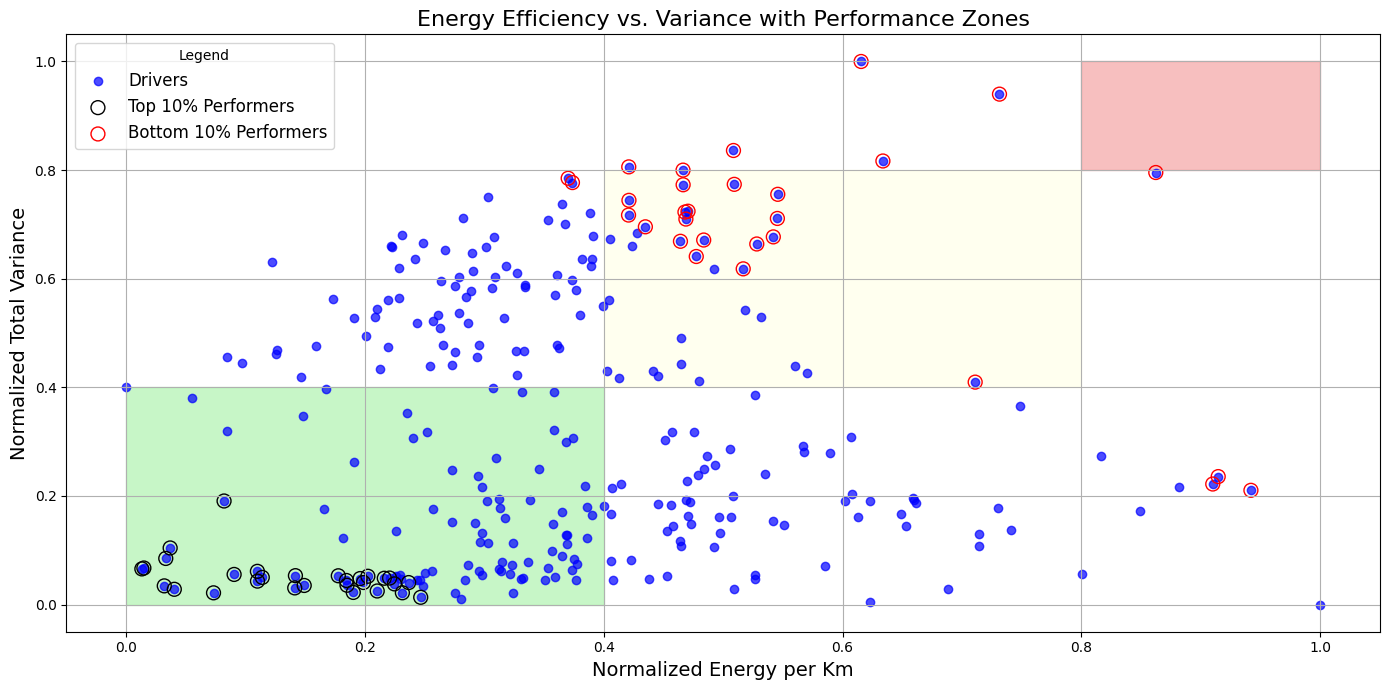

Top 10% Performers:
   si_siv_ndriver_def  composite_score  Trip_Count  energy_per_km  \
0                3118         0.966767        5739       0.032048   
1                3133         0.965703       14646       0.040463   
2                2254         0.960528        9344       0.013290   
3                3374         0.958852        8005       0.014971   
4                3124         0.952545       18089       0.073286   
5                3256         0.940885        4680       0.033295   
6                3462         0.929384       21985       0.036985   
7                2925         0.926994       15343       0.090536   
8                2746         0.923359       28151       0.110091   
9                3339         0.917936       17527       0.114108   
10               3534         0.914389       26565       0.110029   
11               2396         0.914022       25558       0.141283   
12               2994         0.907801       21530       0.149226   
13            

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('Energy_LineApril2022to2024.csv')

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['si_siv_ndriver_def', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]

# Filter the dataset to include only these drivers
filtered_driver_ids = filtered_trip_counts['si_siv_ndriver_def']
filtered_df = df[df['si_siv_ndriver_def'].isin(filtered_driver_ids)].copy()

# Define the selected energy columns for analysis
selected_energy_columns = [
    'net_energy_consumed_by_UT', 'auxiliary_energy_consumed', 'traction_energy', 
    'regenerated_traction_energy'
]

# Calculate energy consumed per kilometer and per trip for each driver
filtered_df.loc[:, 'energy_per_km'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df['kilometres']
filtered_df.loc[:, 'energy_per_trip'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df.groupby('si_siv_ndriver_def')['ut'].transform('size')

# Group by driver and calculate mean energy efficiency ratios
driver_efficiency_stats = filtered_df.groupby('si_siv_ndriver_def').agg({
    'energy_per_km': 'mean',
    'energy_per_trip': 'mean'
}).reset_index()

# Group by driver and calculate variance for each selected energy metric
driver_energy_variance = filtered_df.groupby('si_siv_ndriver_def')[selected_energy_columns].var().reset_index()

# Calculate the total variance across all selected energy metrics
driver_energy_variance['total_variance'] = driver_energy_variance[selected_energy_columns].sum(axis=1)

# Merge the efficiency stats and variance data with the trip counts
driver_stats = pd.merge(driver_efficiency_stats, driver_energy_variance, on='si_siv_ndriver_def')
driver_stats = pd.merge(driver_stats, filtered_trip_counts, on='si_siv_ndriver_def')

# Normalize the energy efficiency ratios and total variance
scaler = MinMaxScaler()
driver_stats[['energy_per_km', 'energy_per_trip', 'total_variance']] = scaler.fit_transform(
    driver_stats[['energy_per_km', 'energy_per_trip', 'total_variance']]
)

# Combine the normalized scores into a weighted composite score
# Lower energy_per_km and lower total_variance are better
# We'll use weights to emphasize lower values for both metrics
driver_stats['composite_score'] = 0.5 * (1 - driver_stats['energy_per_km']) + 0.5 * (1 - driver_stats['total_variance'])

# Rank drivers based on the composite score
driver_stats = driver_stats.sort_values(by='composite_score', ascending=False).reset_index(drop=True)

# Plot scatter plot of energy_per_km vs. total_variance categorized by efficiency
plt.figure(figsize=(14, 7))

# Shade regions
plt.fill_betweenx([0, 0.4], 0, 0.4, color='lightgreen', alpha=0.5)
plt.fill_betweenx([0.4, 0.8], 0.4, 0.8, color='lightyellow', alpha=0.5)
plt.fill_betweenx([0.8, 1], 0.8, 1, color='lightcoral', alpha=0.5)

# Plot data points
plt.scatter(driver_stats['energy_per_km'], driver_stats['total_variance'], alpha=0.7, c='blue', label='Drivers')

# Highlight the top 10% performers
top_10_percent_cutoff = driver_stats['composite_score'].quantile(0.90)
top_performers = driver_stats[driver_stats['composite_score'] >= top_10_percent_cutoff]
plt.scatter(top_performers['energy_per_km'], top_performers['total_variance'], edgecolor='black', facecolor='none', s=100, label='Top 10% Performers')

# Highlight the bottom 10% performers
bottom_10_percent_cutoff = driver_stats['composite_score'].quantile(0.10)
bottom_performers = driver_stats[driver_stats['composite_score'] <= bottom_10_percent_cutoff]
plt.scatter(bottom_performers['energy_per_km'], bottom_performers['total_variance'], edgecolor='red', facecolor='none', s=100, label='Bottom 10% Performers')

plt.xlabel('Normalized Energy per Km', fontsize=14)
plt.ylabel('Normalized Total Variance', fontsize=14)
plt.title('Energy Efficiency vs. Variance with Performance Zones', fontsize=16)
plt.legend(title='Legend', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Display top 10% and bottom 10% performers
print("Top 10% Performers:")
print(top_performers[['si_siv_ndriver_def', 'composite_score', 'Trip_Count', 'energy_per_km', 'total_variance']])

print("\nBottom 10% Performers:")
print(bottom_performers[['si_siv_ndriver_def', 'composite_score', 'Trip_Count', 'energy_per_km', 'total_variance']])


Below is the same plot but it considers net_energy_consumed_by_UT_weight instead of net_energy_consumed_by_UT

   energy_per_km  energy_per_trip
0       3.324156         0.000784
1      10.917237         0.002981
2      13.095465         0.004860
3       7.109909         0.001301
4       2.612938         0.000762
  si_siv_ndriver_def  composite_score  Trip_Count  Unique_Trips  \
0               3118         0.971223        5739            52   
1               3133         0.968706       14646            52   
2               2254         0.966039        9344            52   
3               3374         0.963736        8005            89   
4               3124         0.957600       18089            52   

   energy_per_km  total_variance  
0       0.024591        0.032964  
1       0.036408        0.026180  
2       0.003218        0.064703  
3       0.008256        0.064272  
4       0.064529        0.020272  


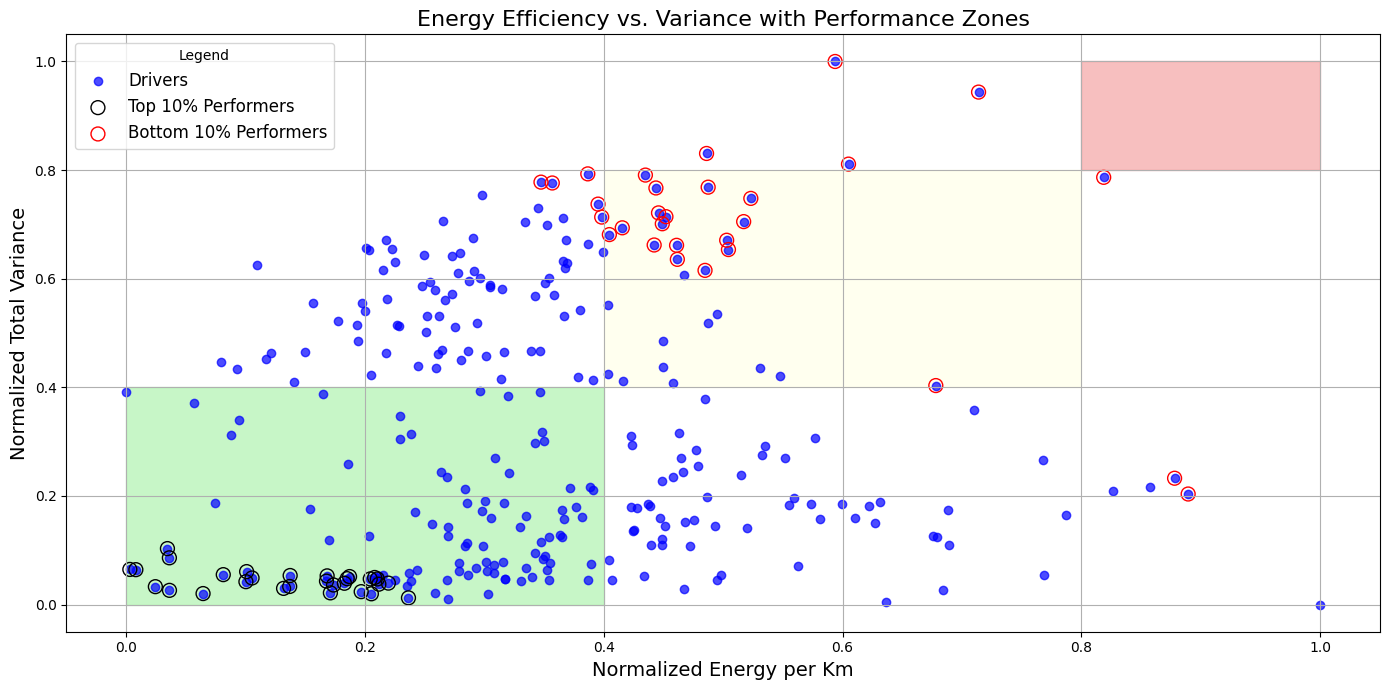

Top 10% Performers:
   si_siv_ndriver_def  composite_score  Trip_Count  Unique_Trips  \
0                3118         0.971223        5739            52   
1                3133         0.968706       14646            52   
2                2254         0.966039        9344            52   
3                3374         0.963736        8005            89   
4                3124         0.957600       18089            52   
5                3256         0.938793        4680            52   
6                2925         0.931715       15343            53   
7                3462         0.931106       21985           120   
8                2746         0.928722       28151            53   
9                3339         0.922739       17527            97   
10               3534         0.919147       26565            73   
11               2396         0.919127       25558            85   
12               2994         0.914811       21530            53   
13               3270       

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('Energy_LineApril2022to2024.csv')

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['si_siv_ndriver_def', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]

# Filter the dataset to include only these drivers
filtered_driver_ids = filtered_trip_counts['si_siv_ndriver_def']
filtered_df = df[df['si_siv_ndriver_def'].isin(filtered_driver_ids)].copy()

# Create unique trip identifiers
filtered_df['trip'] = filtered_df['current_station'].astype(str) + '-' + filtered_df['next_station'].astype(str)

# Count the number of unique trips each driver has driven
unique_trips_per_driver = filtered_df.groupby('si_siv_ndriver_def')['trip'].nunique().reset_index()
unique_trips_per_driver.columns = ['si_siv_ndriver_def', 'Unique_Trips']

# Calculate energy efficiency metrics for each driver
filtered_df['energy_per_km'] = filtered_df['net_energy_consumed_by_UT_weight'] / filtered_df['kilometres']
filtered_df['energy_per_trip'] = filtered_df['net_energy_consumed_by_UT_weight'] / filtered_df.groupby('si_siv_ndriver_def')['ut'].transform('size')

# Ensure the new columns are created
print(filtered_df[['energy_per_km', 'energy_per_trip']].head())

# Group by driver and calculate mean energy efficiency ratios
driver_efficiency_stats = filtered_df.groupby('si_siv_ndriver_def').agg({
    'energy_per_km': 'mean',
    'energy_per_trip': 'mean'
}).reset_index()

# Calculate variance for each selected energy metric
selected_energy_columns = [
    'net_energy_consumed_by_UT_weight', 'auxiliary_energy_consumed', 'traction_energy', 
    'regenerated_traction_energy'
]
driver_energy_variance = filtered_df.groupby('si_siv_ndriver_def')[selected_energy_columns].var().reset_index()
driver_energy_variance['total_variance'] = driver_energy_variance[selected_energy_columns].sum(axis=1)

# Merge the efficiency stats, variance data, and trip counts
driver_stats = pd.merge(driver_efficiency_stats, driver_energy_variance, on='si_siv_ndriver_def')
driver_stats = pd.merge(driver_stats, filtered_trip_counts, on='si_siv_ndriver_def')
driver_stats = pd.merge(driver_stats, unique_trips_per_driver, on='si_siv_ndriver_def')

# Normalize the energy efficiency ratios and total variance
scaler = MinMaxScaler()
driver_stats[['energy_per_km', 'energy_per_trip', 'total_variance']] = scaler.fit_transform(
    driver_stats[['energy_per_km', 'energy_per_trip', 'total_variance']]
)

# Combine the normalized scores into a weighted composite score
driver_stats['composite_score'] = 0.5 * (1 - driver_stats['energy_per_km']) + 0.5 * (1 - driver_stats['total_variance'])

# Rank drivers based on the composite score
driver_stats = driver_stats.sort_values(by='composite_score', ascending=False).reset_index(drop=True)

# Display the first few rows to verify
print(driver_stats[['si_siv_ndriver_def', 'composite_score', 'Trip_Count', 'Unique_Trips', 'energy_per_km', 'total_variance']].head())

# Plot scatter plot of energy_per_km vs. total_variance categorized by efficiency
plt.figure(figsize=(14, 7))

# Shade regions
plt.fill_betweenx([0, 0.4], 0, 0.4, color='lightgreen', alpha=0.5)
plt.fill_betweenx([0.4, 0.8], 0.4, 0.8, color='lightyellow', alpha=0.5)
plt.fill_betweenx([0.8, 1], 0.8, 1, color='lightcoral', alpha=0.5)

# Plot data points
plt.scatter(driver_stats['energy_per_km'], driver_stats['total_variance'], alpha=0.7, c='blue', label='Drivers')

# Highlight the top 10% performers
top_10_percent_cutoff = driver_stats['composite_score'].quantile(0.90)
top_performers = driver_stats[driver_stats['composite_score'] >= top_10_percent_cutoff]
plt.scatter(top_performers['energy_per_km'], top_performers['total_variance'], edgecolor='black', facecolor='none', s=100, label='Top 10% Performers')

# Highlight the bottom 10% performers
bottom_10_percent_cutoff = driver_stats['composite_score'].quantile(0.10)
bottom_performers = driver_stats[driver_stats['composite_score'] <= bottom_10_percent_cutoff]
plt.scatter(bottom_performers['energy_per_km'], bottom_performers['total_variance'], edgecolor='red', facecolor='none', s=100, label='Bottom 10% Performers')

plt.xlabel('Normalized Energy per Km', fontsize=14)
plt.ylabel('Normalized Total Variance', fontsize=14)
plt.title('Energy Efficiency vs. Variance with Performance Zones', fontsize=16)
plt.legend(title='Legend', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Display top 10% and bottom 10% performers
print("Top 10% Performers:")
print(top_performers[['si_siv_ndriver_def', 'composite_score', 'Trip_Count', 'Unique_Trips', 'energy_per_km', 'total_variance']])

print("\nBottom 10% Performers:")
print(bottom_performers[['si_siv_ndriver_def', 'composite_score', 'Trip_Count', 'Unique_Trips', 'energy_per_km', 'total_variance']])


Number of unique trips: 168

Top 10 Trips by Average Energy Consumption:
                                trip  net_energy_consumed_by_UT
49                 Durango-Kukullaga                  60.546888
110    Lurgorri-Amorebieta Geralekua                  57.159162
42                        Deba-Arroa                  56.288760
122                Muxika-Zugastieta                  47.154482
18                        Arroa-Deba                  43.358282
53                  Elgoibar-Azitain                  40.078064
58           Ermua-Zaldibar Apeadero                  38.824932
7     Amorebieta Geralekua-Kukullaga                  37.299727
43                      Deba-Mendaro                  37.198234
9    Amorebieta Geralekua-Zugastieta                  35.391034


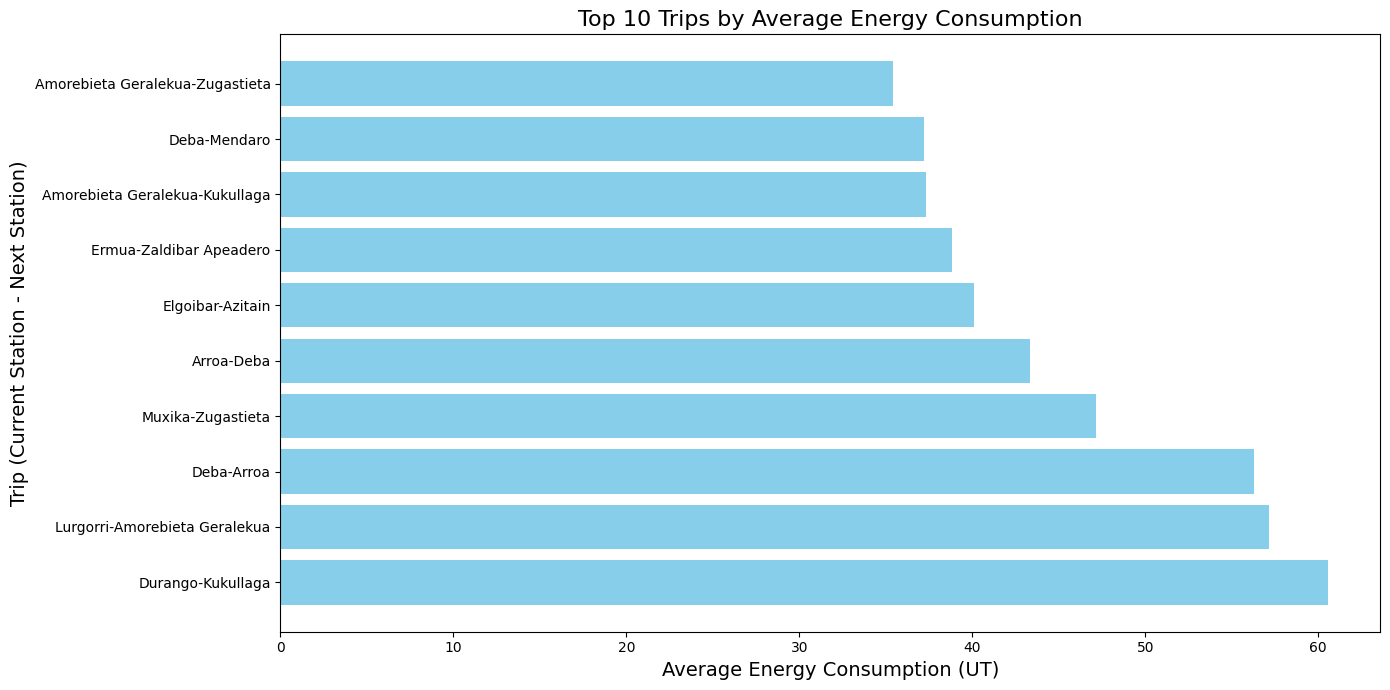

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Energy_LineApril2022to2024.csv')

# Count the number of unique trips based on current_station and next_station
df['trip'] = df['current_station'].astype(str) + '-' + df['next_station'].astype(str)
unique_trips = df['trip'].nunique()

# Group by trips and calculate average energy consumption for each trip
trip_energy_consumption = df.groupby('trip')['net_energy_consumed_by_UT'].mean().reset_index()

# Print the number of unique trips
print(f"Number of unique trips: {unique_trips}")

# Display the top 10 trips by average energy consumption
top_10_trips = trip_energy_consumption.sort_values(by='net_energy_consumed_by_UT', ascending=False).head(10)
print("\nTop 10 Trips by Average Energy Consumption:")
print(top_10_trips)

# Plotting the average energy consumption per trip
plt.figure(figsize=(14, 7))
plt.barh(top_10_trips['trip'], top_10_trips['net_energy_consumed_by_UT'], color='skyblue')
plt.xlabel('Average Energy Consumption (UT)', fontsize=14)
plt.ylabel('Trip (Current Station - Next Station)', fontsize=14)
plt.title('Top 10 Trips by Average Energy Consumption', fontsize=16)
plt.tight_layout()
plt.show()


Every trip by net_energy_consumed_by_UT and net_energy_consumed_by_UT_weight

Graph of net_energy_consumed_by_UT

Number of unique trips: 168


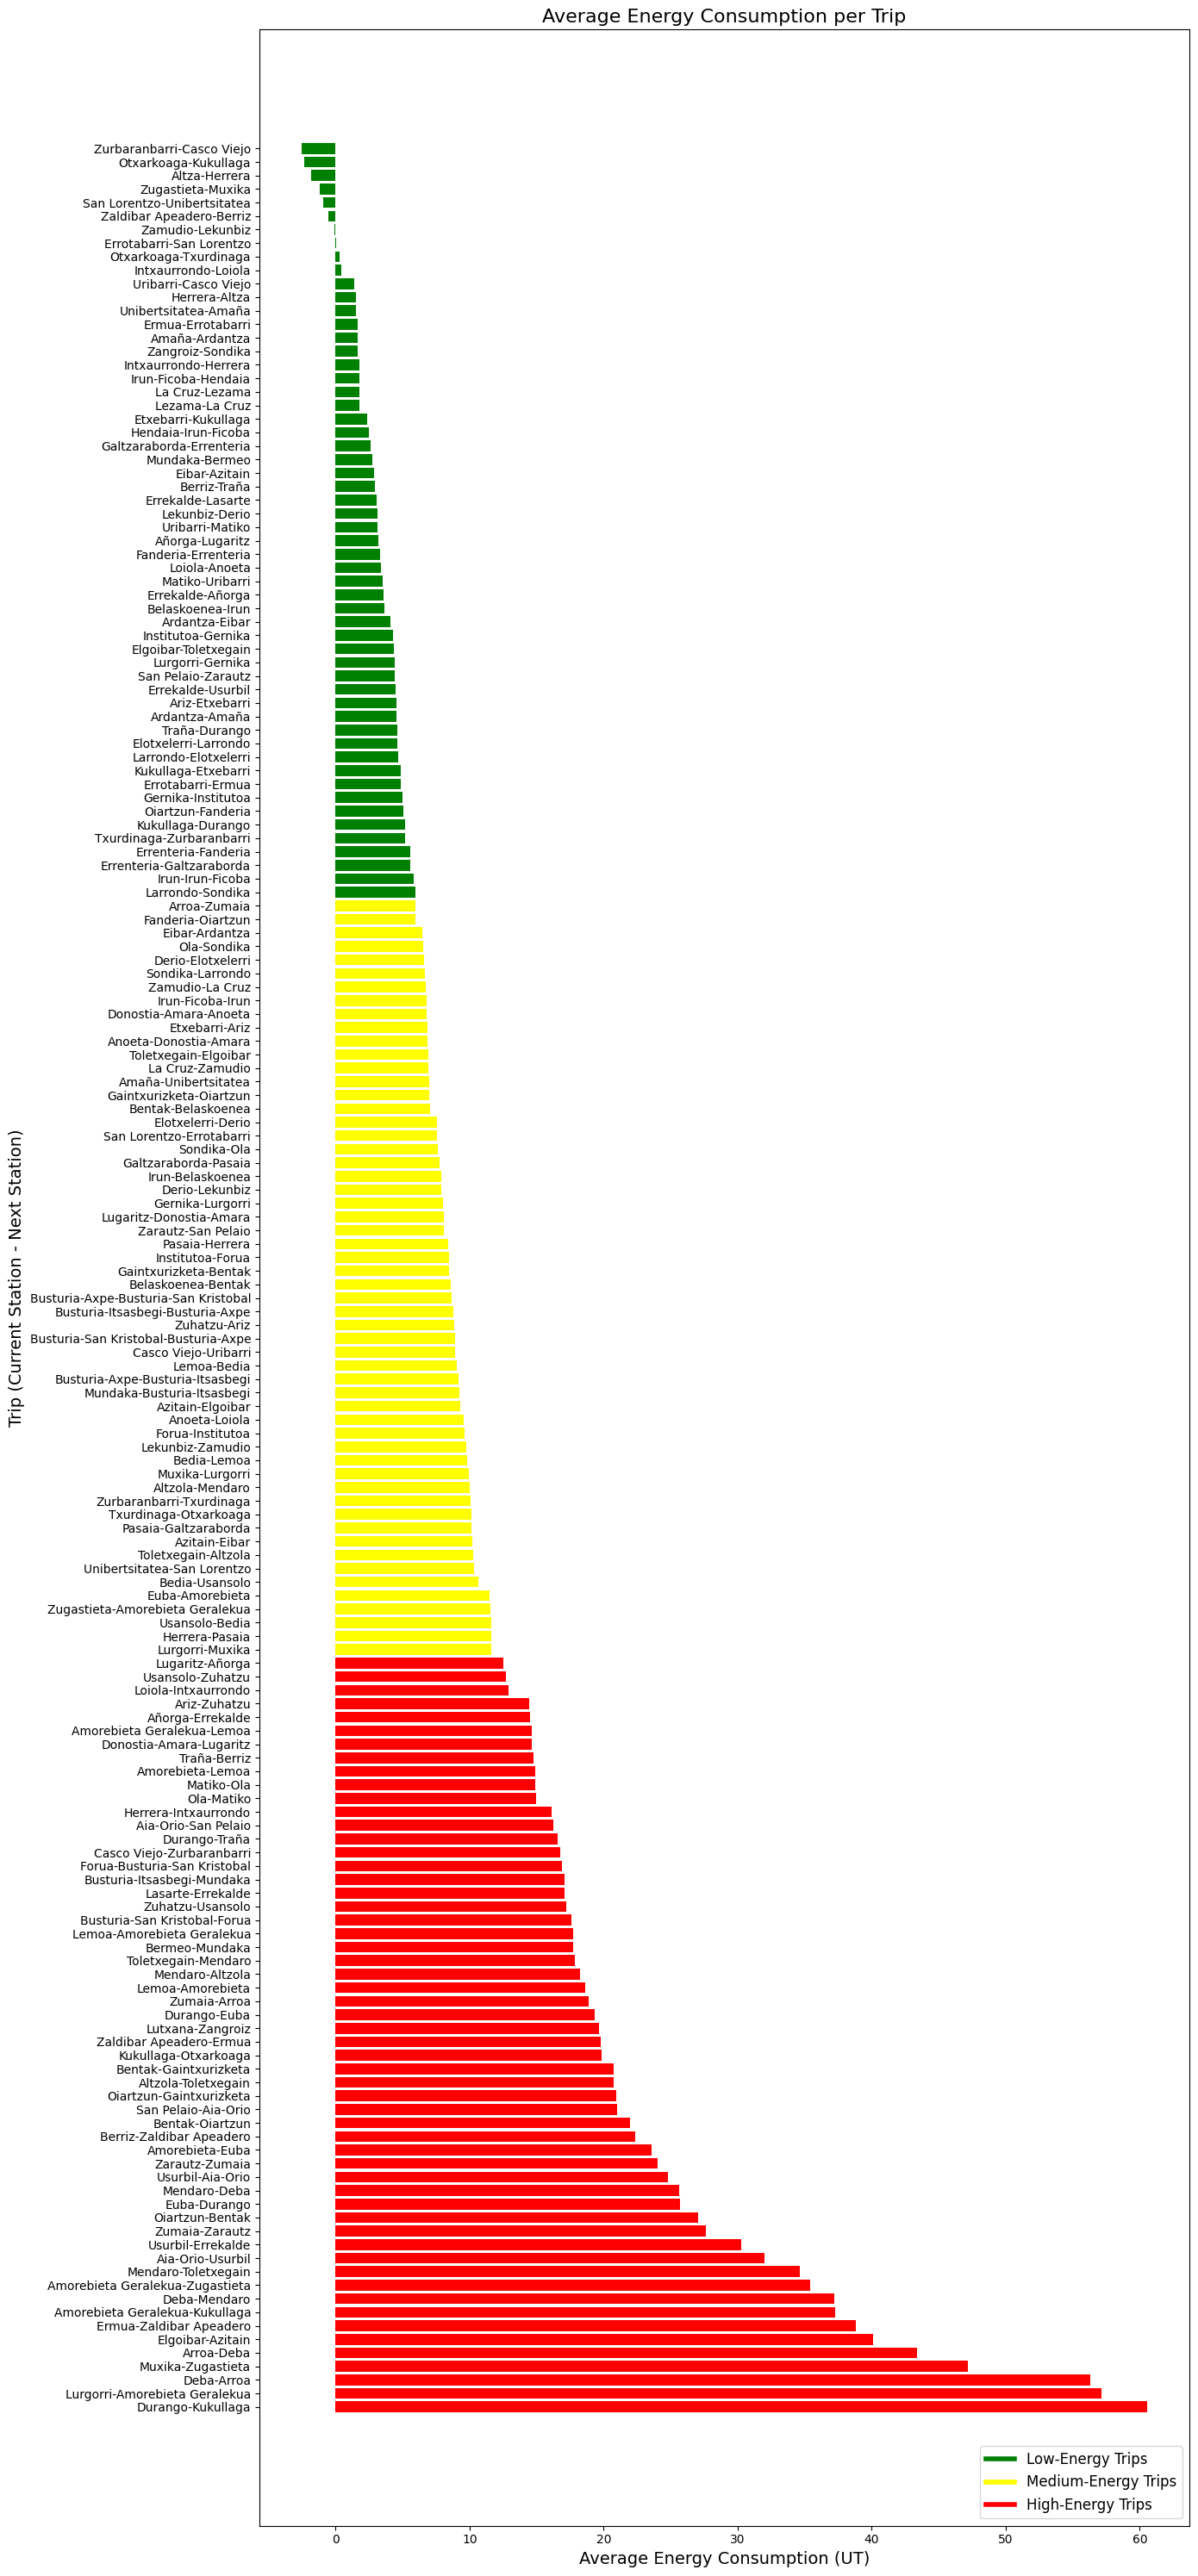

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Energy_LineApril2022to2024.csv')

# Count the number of unique trips based on current_station and next_station
df['trip'] = df['current_station'].astype(str) + '-' + df['next_station'].astype(str)
unique_trips = df['trip'].nunique()

# Group by trips and calculate average energy consumption for each trip
trip_energy_consumption = df.groupby('trip')['net_energy_consumed_by_UT'].mean().reset_index()

# Sort trips by energy consumption
trip_energy_consumption = trip_energy_consumption.sort_values(by='net_energy_consumed_by_UT', ascending=True)

# Determine the thresholds for the energy categories
trip_energy_consumption['category'] = pd.qcut(
    trip_energy_consumption['net_energy_consumed_by_UT'],
    q=3,
    labels=['Low-Energy Trips', 'Medium-Energy Trips', 'High-Energy Trips']
)

# Print the number of unique trips
print(f"Number of unique trips: {unique_trips}")

# Plotting the average energy consumption per trip with categories
plt.figure(figsize=(14, 30))  # Increased figure height for better readability
colors = {'Low-Energy Trips': 'green', 'Medium-Energy Trips': 'yellow', 'High-Energy Trips': 'red'}

bars = plt.barh(trip_energy_consumption['trip'], trip_energy_consumption['net_energy_consumed_by_UT'], 
                color=trip_energy_consumption['category'].map(colors))
plt.xlabel('Average Energy Consumption (UT)', fontsize=14)
plt.ylabel('Trip (Current Station - Next Station)', fontsize=14)
plt.title('Average Energy Consumption per Trip', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the lowest consumption at the top

# Add a legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors.values()]
labels = colors.keys()
plt.legend(handles, labels, loc='lower right', fontsize=12)

plt.tight_layout()
plt.show()


Graph of net_energy_consumed_by_UT_weight

Number of unique trips: 168


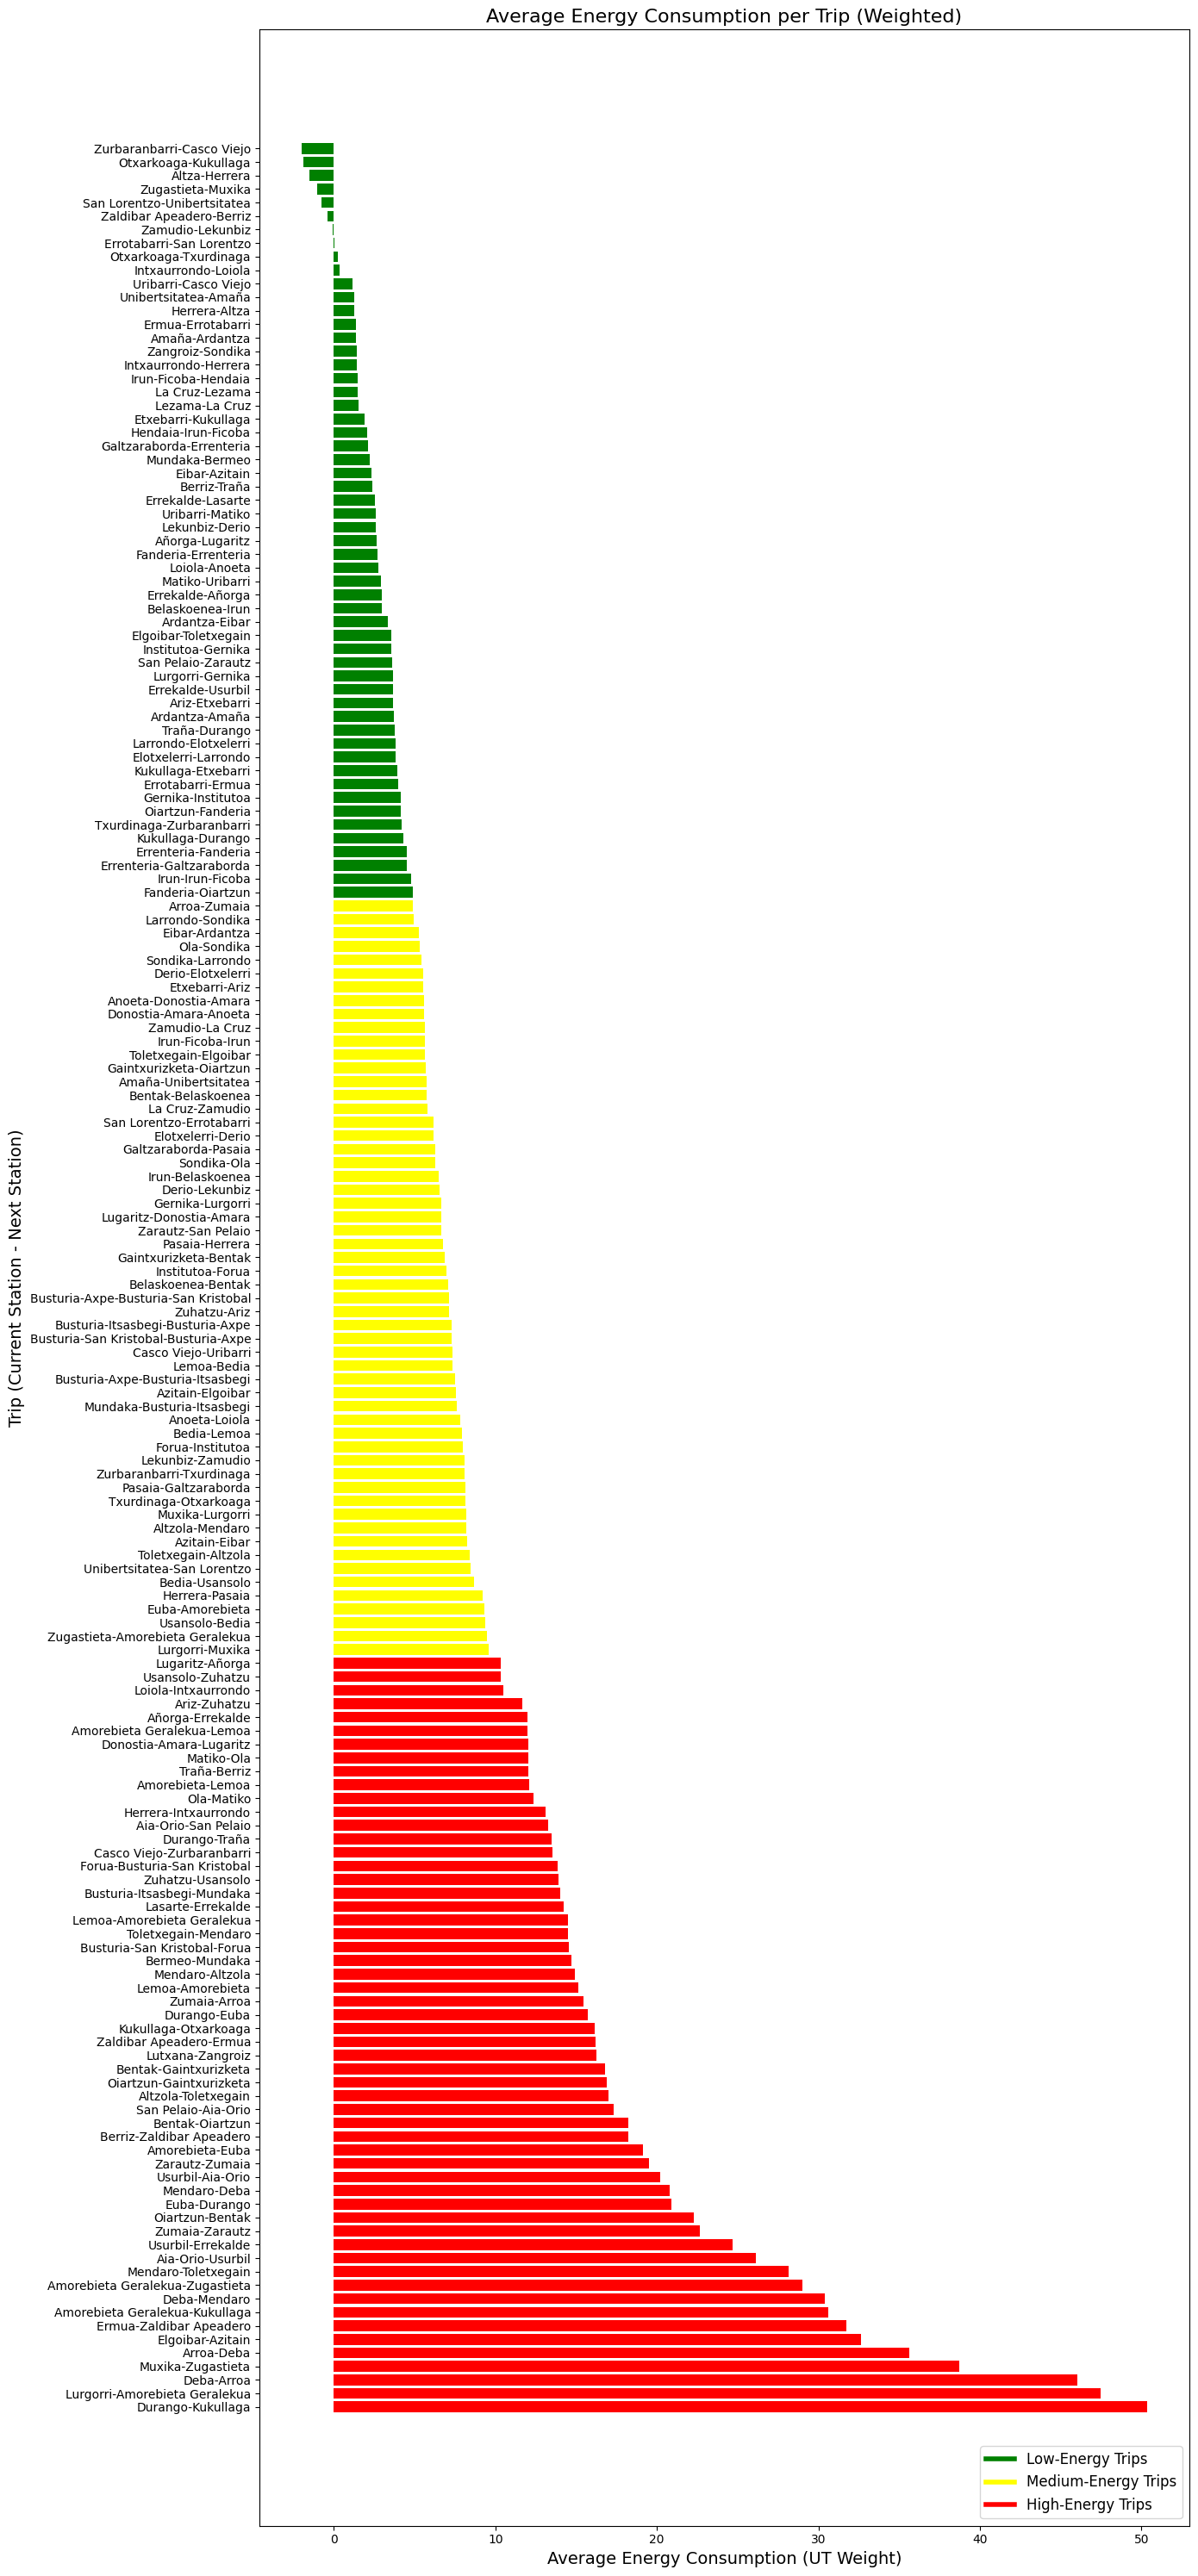

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Energy_LineApril2022to2024.csv')

# Count the number of unique trips based on current_station and next_station
df['trip'] = df['current_station'].astype(str) + '-' + df['next_station'].astype(str)
unique_trips = df['trip'].nunique()

# Group by trips and calculate average energy consumption for each trip
trip_energy_consumption_weighted = df.groupby('trip')['net_energy_consumed_by_UT_weight'].mean().reset_index()

# Sort trips by energy consumption
trip_energy_consumption_weighted = trip_energy_consumption_weighted.sort_values(by='net_energy_consumed_by_UT_weight', ascending=True)

# Determine the thresholds for the energy categories
trip_energy_consumption_weighted['category'] = pd.qcut(
    trip_energy_consumption_weighted['net_energy_consumed_by_UT_weight'],
    q=3,
    labels=['Low-Energy Trips', 'Medium-Energy Trips', 'High-Energy Trips']
)

# Print the number of unique trips
print(f"Number of unique trips: {unique_trips}")

# Plotting the average energy consumption per trip with categories
plt.figure(figsize=(14, 30))  # Increased figure height for better readability
colors = {'Low-Energy Trips': 'green', 'Medium-Energy Trips': 'yellow', 'High-Energy Trips': 'red'}

bars = plt.barh(trip_energy_consumption_weighted['trip'], trip_energy_consumption_weighted['net_energy_consumed_by_UT_weight'], 
                color=trip_energy_consumption_weighted['category'].map(colors))
plt.xlabel('Average Energy Consumption (UT Weight)', fontsize=14)
plt.ylabel('Trip (Current Station - Next Station)', fontsize=14)
plt.title('Average Energy Consumption per Trip (Weighted)', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the lowest consumption at the top

# Add a legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors.values()]
labels = colors.keys()
plt.legend(handles, labels, loc='lower right', fontsize=12)

plt.tight_layout()
plt.show()


Performance of drivers across different types of trips

/var/folders/r9/rbqvsh7s37s14ymslf_q35hc0000gn/T/ipykernel_66721/2095726194.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  driver_efficiency_stats = filtered_df.groupby(['si_siv_ndriver_def', 'category']).agg({
/var/folders/r9/rbqvsh7s37s14ymslf_q35hc0000gn/T/ipykernel_66721/2095726194.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  driver_energy_variance = filtered_df.groupby(['si_siv_ndriver_def', 'category'])[selected_energy_columns].var().reset_index()
/var/folders/r9/rbqvsh7s37s14ymslf_q35hc0000gn/T/ipykernel_66721/2095726194.py:81: SettingWithCopyWarning: 
A value is trying to be set on a cop

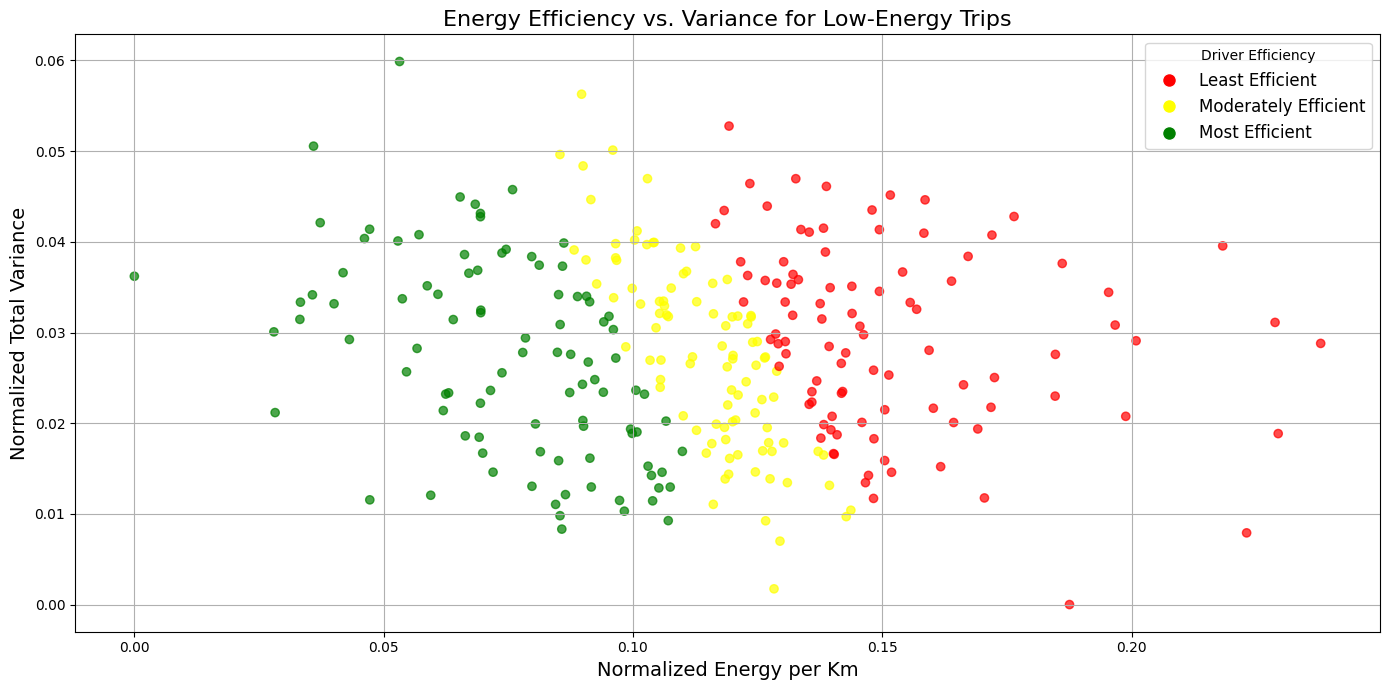

/var/folders/r9/rbqvsh7s37s14ymslf_q35hc0000gn/T/ipykernel_66721/2095726194.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['color'] = pd.qcut(category_data['composite_score'], q=3, labels=['red', 'yellow', 'green'])


Top 10 Most Efficient Drivers for Low-Energy Trips:
  si_siv_ndriver_def  composite_score  Trip_Count  Unique_Trips  \
0               2278         0.981898        2742            95   
1               2854         0.975299       10038            95   
2               3286         0.970972        3841            79   
3               2254         0.970618        9344            52   
4               3236         0.967677        4353            80   
5               3275         0.966672        1582            76   
6               1963         0.965066        2186            84   
7               3118         0.964252        5739            52   
8               3256         0.963821        4680            52   
9               3588         0.963391        2309            64   

   energy_per_km  total_variance  
0       0.000000        0.036205  
1       0.028234        0.021168  
2       0.027985        0.030071  
3       0.047217        0.011548  
4       0.033199        0.031448  


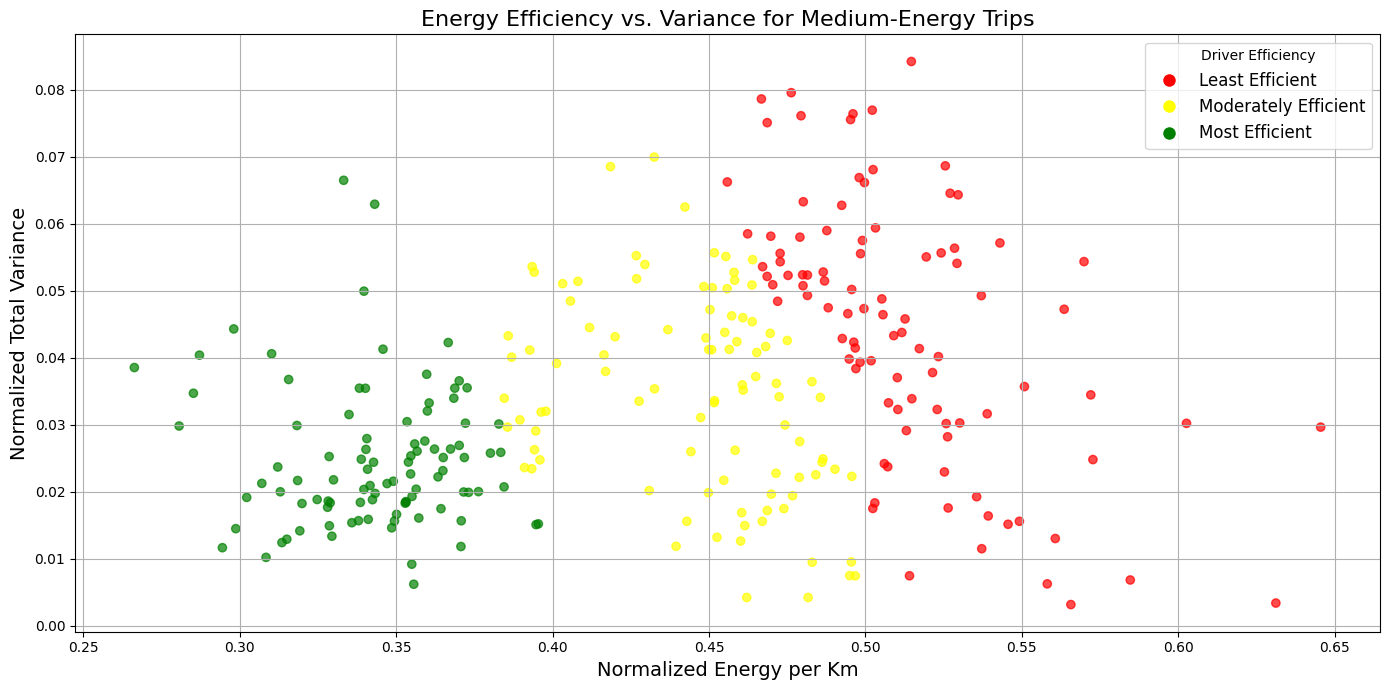

Top 10 Most Efficient Drivers for Medium-Energy Trips:
    si_siv_ndriver_def  composite_score  Trip_Count  Unique_Trips  \
288               2251         0.847585        2453            84   
289               3374         0.846951        8005            89   
290               1672         0.844789        7823            95   
291               3133         0.843392       14646            52   
292               3124         0.840700       18089            52   
293               2046         0.840061       16835           101   
294               3462         0.839314       21985           120   
295               2746         0.837054       28151            53   
296               2854         0.836253       10038            95   
297               3339         0.836025       17527            97   

     energy_per_km  total_variance  
288       0.266276        0.038555  
289       0.294426        0.011671  
290       0.280591        0.029831  
291       0.298705        0.014511  


/var/folders/r9/rbqvsh7s37s14ymslf_q35hc0000gn/T/ipykernel_66721/2095726194.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['color'] = pd.qcut(category_data['composite_score'], q=3, labels=['red', 'yellow', 'green'])


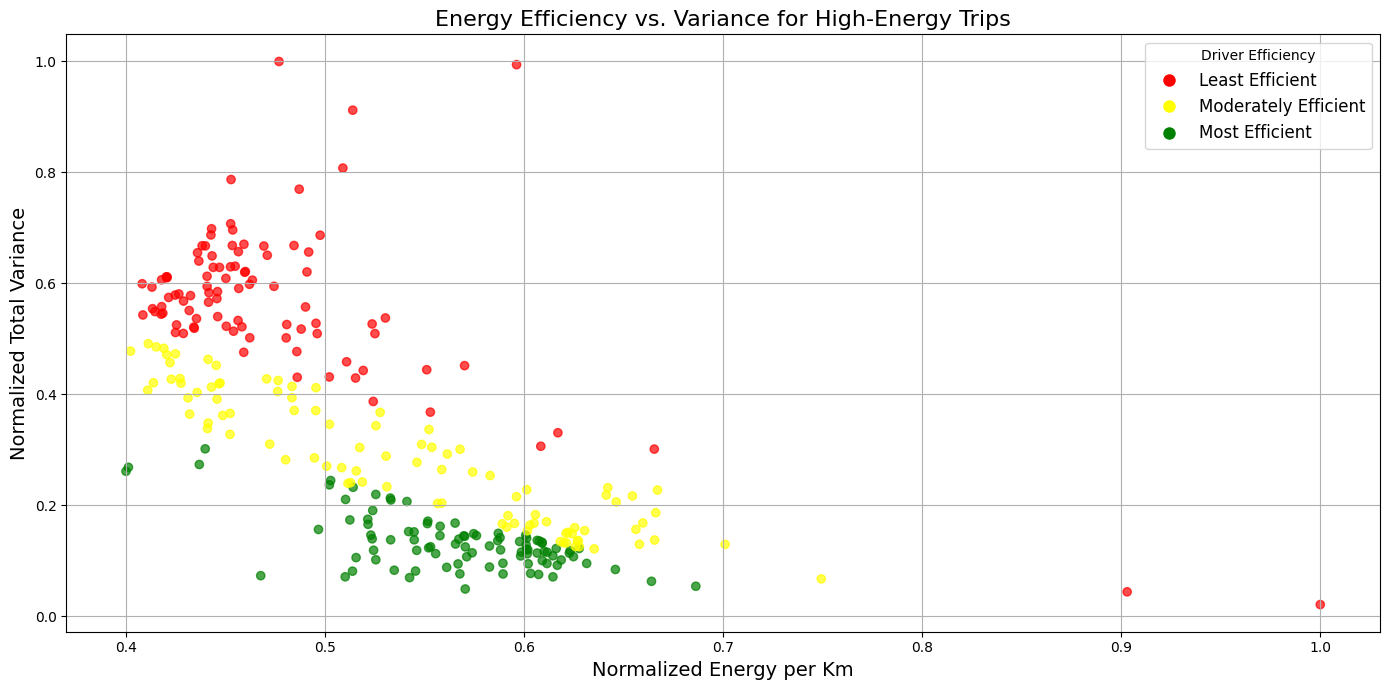

Top 10 Most Efficient Drivers for High-Energy Trips:
    si_siv_ndriver_def  composite_score  Trip_Count  Unique_Trips  \
576               3340         0.729722        3386            71   
577               3249         0.709508        3795            68   
578               3379         0.702613       10210            90   
579               3678         0.694065        1903            74   
580               3275         0.691259        1582            76   
581               3677         0.690355        2111            52   
582               2278         0.689466        2742            95   
583               3588         0.686657        2309            64   
584               2246         0.686455        3384            72   
585               3882         0.678440        4459           109   

     energy_per_km  total_variance  
576       0.467559        0.072998  
577       0.510013        0.070971  
578       0.513671        0.081103  
579       0.542357        0.069513  
58

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('Energy_LineApril2022to2024.csv')

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['si_siv_ndriver_def', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]

# Filter the dataset to include only these drivers
filtered_driver_ids = filtered_trip_counts['si_siv_ndriver_def']
filtered_df = df[df['si_siv_ndriver_def'].isin(filtered_driver_ids)].copy()

# Create unique trip identifiers
filtered_df['trip'] = filtered_df['current_station'].astype(str) + '-' + filtered_df['next_station'].astype(str)

# Group by trips and calculate average energy consumption for each trip
trip_energy_consumption = filtered_df.groupby('trip')['net_energy_consumed_by_UT_weight'].mean().reset_index()

# Sort trips by energy consumption
trip_energy_consumption = trip_energy_consumption.sort_values(by='net_energy_consumed_by_UT_weight', ascending=True)

# Determine the thresholds for the energy categories
trip_energy_consumption['category'] = pd.qcut(
    trip_energy_consumption['net_energy_consumed_by_UT_weight'],
    q=3,
    labels=['Low-Energy Trips', 'Medium-Energy Trips', 'High-Energy Trips']
)

# Merge the categorized trip data back into the filtered_df
filtered_df = filtered_df.merge(trip_energy_consumption[['trip', 'category']], on='trip', how='left')

# Calculate energy efficiency metrics for each driver
filtered_df['energy_per_km'] = filtered_df['net_energy_consumed_by_UT_weight'] / filtered_df['kilometres']
filtered_df['energy_per_trip'] = filtered_df['net_energy_consumed_by_UT_weight'] / filtered_df.groupby('si_siv_ndriver_def')['ut'].transform('size')

# Group by driver and calculate mean energy efficiency ratios for each category
driver_efficiency_stats = filtered_df.groupby(['si_siv_ndriver_def', 'category']).agg({
    'energy_per_km': 'mean',
    'energy_per_trip': 'mean'
}).reset_index()

# Calculate variance for each selected energy metric within each category
selected_energy_columns = [
    'net_energy_consumed_by_UT_weight', 'auxiliary_energy_consumed', 'traction_energy', 
    'regenerated_traction_energy'
]
driver_energy_variance = filtered_df.groupby(['si_siv_ndriver_def', 'category'])[selected_energy_columns].var().reset_index()
driver_energy_variance['total_variance'] = driver_energy_variance[selected_energy_columns].sum(axis=1)

# Merge the efficiency stats, variance data, and trip counts
driver_stats = pd.merge(driver_efficiency_stats, driver_energy_variance, on=['si_siv_ndriver_def', 'category'])
driver_stats = pd.merge(driver_stats, filtered_trip_counts, on='si_siv_ndriver_def')
unique_trips_per_driver = filtered_df.groupby('si_siv_ndriver_def')['trip'].nunique().reset_index()
unique_trips_per_driver.columns = ['si_siv_ndriver_def', 'Unique_Trips']
driver_stats = pd.merge(driver_stats, unique_trips_per_driver, on='si_siv_ndriver_def')

# Normalize the energy efficiency ratios and total variance
scaler = MinMaxScaler()
driver_stats[['energy_per_km', 'energy_per_trip', 'total_variance']] = scaler.fit_transform(
    driver_stats[['energy_per_km', 'energy_per_trip', 'total_variance']]
)

# Combine the normalized scores into a weighted composite score
driver_stats['composite_score'] = 0.5 * (1 - driver_stats['energy_per_km']) + 0.5 * (1 - driver_stats['total_variance'])

# Rank drivers based on the composite score within each category
driver_stats = driver_stats.sort_values(by=['category', 'composite_score'], ascending=[True, False]).reset_index(drop=True)

# Define function to plot the scatter plot for a specific category
def plot_category(category, title):
    category_data = driver_stats[driver_stats['category'] == category]
    
    # Define colors based on efficiency
    num_drivers = len(category_data)
    category_data['color'] = pd.qcut(category_data['composite_score'], q=3, labels=['red', 'yellow', 'green'])
    
    plt.figure(figsize=(14, 7))
    
    scatter = plt.scatter(category_data['energy_per_km'], category_data['total_variance'], c=category_data['color'], alpha=0.7, label='Drivers')
    
    plt.xlabel('Normalized Energy per Km', fontsize=14)
    plt.ylabel('Normalized Total Variance', fontsize=14)
    plt.title(title, fontsize=16)
    
    # Add a legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Least Efficient'),
               plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Moderately Efficient'),
               plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Most Efficient')]
    plt.legend(handles=handles, title='Driver Efficiency', fontsize=12)
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Print top 10 most efficient drivers for this category
    top_10_drivers = category_data[category_data['color'] == 'green'].head(10)
    print(f"Top 10 Most Efficient Drivers for {category}:")
    print(top_10_drivers[['si_siv_ndriver_def', 'composite_score', 'Trip_Count', 'Unique_Trips', 'energy_per_km', 'total_variance']])

# Plot the scatter plots for each category
plot_category('Low-Energy Trips', 'Energy Efficiency vs. Variance for Low-Energy Trips')
plot_category('Medium-Energy Trips', 'Energy Efficiency vs. Variance for Medium-Energy Trips')
plot_category('High-Energy Trips', 'Energy Efficiency vs. Variance for High-Energy Trips')


In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('Energy_LineApril2022to2024.csv')

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['si_siv_ndriver_def', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]

# Filter the dataset to include only these drivers
filtered_driver_ids = filtered_trip_counts['si_siv_ndriver_def']
filtered_df = df[df['si_siv_ndriver_def'].isin(filtered_driver_ids)].copy()

# Create unique trip identifiers
filtered_df['trip'] = filtered_df['current_station'].astype(str) + '-' + filtered_df['next_station'].astype(str)

# Group by trips and calculate average energy consumption for each trip
trip_energy_consumption = filtered_df.groupby('trip')['net_energy_consumed_by_UT_weight'].mean().reset_index()

# Sort trips by energy consumption
trip_energy_consumption = trip_energy_consumption.sort_values(by='net_energy_consumed_by_UT_weight', ascending=True)

# Determine the thresholds for the energy categories
trip_energy_consumption['category'] = pd.qcut(
    trip_energy_consumption['net_energy_consumed_by_UT_weight'],
    q=3,
    labels=['Low-Energy Trips', 'Medium-Energy Trips', 'High-Energy Trips']
)

# Merge the categorized trip data back into the filtered_df
filtered_df = filtered_df.merge(trip_energy_consumption[['trip', 'category']], on='trip', how='left')

# Calculate energy efficiency metrics for each driver
filtered_df['energy_per_km'] = filtered_df['net_energy_consumed_by_UT_weight'] / filtered_df['kilometres']
filtered_df['energy_per_trip'] = filtered_df['net_energy_consumed_by_UT_weight'] / filtered_df.groupby('si_siv_ndriver_def')['ut'].transform('size')

# Group by driver and calculate mean energy efficiency ratios for each category
driver_efficiency_stats = filtered_df.groupby(['si_siv_ndriver_def', 'category']).agg({
    'energy_per_km': 'mean',
    'energy_per_trip': 'mean'
}).reset_index()

# Calculate variance for each selected energy metric within each category
selected_energy_columns = [
    'net_energy_consumed_by_UT_weight', 'auxiliary_energy_consumed', 'traction_energy', 
    'regenerated_traction_energy'
]
driver_energy_variance = filtered_df.groupby(['si_siv_ndriver_def', 'category'])[selected_energy_columns].var().reset_index()
driver_energy_variance['total_variance'] = driver_energy_variance[selected_energy_columns].sum(axis=1)

# Merge the efficiency stats, variance data, and trip counts
driver_stats = pd.merge(driver_efficiency_stats, driver_energy_variance, on=['si_siv_ndriver_def', 'category'])
driver_stats = pd.merge(driver_stats, filtered_trip_counts, on='si_siv_ndriver_def')
unique_trips_per_driver = filtered_df.groupby('si_siv_ndriver_def')['trip'].nunique().reset_index()
unique_trips_per_driver.columns = ['si_siv_ndriver_def', 'Unique_Trips']
driver_stats = pd.merge(driver_stats, unique_trips_per_driver, on='si_siv_ndriver_def')

# Normalize the energy efficiency ratios and total variance
scaler = MinMaxScaler()
driver_stats[['energy_per_km', 'energy_per_trip', 'total_variance']] = scaler.fit_transform(
    driver_stats[['energy_per_km', 'energy_per_trip', 'total_variance']]
)

# Combine the normalized scores into a weighted composite score
driver_stats['composite_score'] = 0.5 * (1 - driver_stats['energy_per_km']) + 0.5 * (1 - driver_stats['total_variance'])

# Rank drivers based on the composite score within each category
driver_stats = driver_stats.sort_values(by=['category', 'composite_score'], ascending=[True, False]).reset_index(drop=True)

# Get the top drivers in each category
top_drivers_low = driver_stats[(driver_stats['category'] == 'Low-Energy Trips') & (driver_stats['composite_score'] >= driver_stats[driver_stats['category'] == 'Low-Energy Trips']['composite_score'].quantile(0.67))]
top_drivers_medium = driver_stats[(driver_stats['category'] == 'Medium-Energy Trips') & (driver_stats['composite_score'] >= driver_stats[driver_stats['category'] == 'Medium-Energy Trips']['composite_score'].quantile(0.67))]
top_drivers_high = driver_stats[(driver_stats['category'] == 'High-Energy Trips') & (driver_stats['composite_score'] >= driver_stats[driver_stats['category'] == 'High-Energy Trips']['composite_score'].quantile(0.67))]

# Find drivers who are in the top 33% in all categories
top_drivers_all_categories = set(top_drivers_low['si_siv_ndriver_def']).intersection(
    set(top_drivers_medium['si_siv_ndriver_def']), set(top_drivers_high['si_siv_ndriver_def']))

# Filter the driver_stats to include only those in the top 33% across all categories
top_drivers_stats = driver_stats[driver_stats['si_siv_ndriver_def'].isin(top_drivers_all_categories)].copy()

# Count the number of trips each driver has made in each category
trip_counts_low = filtered_df[filtered_df['category'] == 'Low-Energy Trips'].groupby('si_siv_ndriver_def').size().reset_index(name='Low_Energy_Trips_Count')
trip_counts_medium = filtered_df[filtered_df['category'] == 'Medium-Energy Trips'].groupby('si_siv_ndriver_def').size().reset_index(name='Medium_Energy_Trips_Count')
trip_counts_high = filtered_df[filtered_df['category'] == 'High-Energy Trips'].groupby('si_siv_ndriver_def').size().reset_index(name='High_Energy_Trips_Count')

# Merge the trip counts with the top drivers stats
top_drivers_stats = pd.merge(top_drivers_stats, trip_counts_low, on='si_siv_ndriver_def', how='left')
top_drivers_stats = pd.merge(top_drivers_stats, trip_counts_medium, on='si_siv_ndriver_def', how='left')
top_drivers_stats = pd.merge(top_drivers_stats, trip_counts_high, on='si_siv_ndriver_def', how='left')

# Replace NaN with 0 for trip counts
top_drivers_stats['Low_Energy_Trips_Count'] = top_drivers_stats['Low_Energy_Trips_Count'].fillna(0).astype(int)
top_drivers_stats['Medium_Energy_Trips_Count'] = top_drivers_stats['Medium_Energy_Trips_Count'].fillna(0).astype(int)
top_drivers_stats['High_Energy_Trips_Count'] = top_drivers_stats['High_Energy_Trips_Count'].fillna(0).astype(int)

# Select only the specified columns for the final results
final_columns = ['si_siv_ndriver_def', 'energy_per_km', 'energy_per_trip', 'total_variance', 'Trip_Count', 'Unique_Trips', 'Low_Energy_Trips_Count', 'Medium_Energy_Trips_Count', 'High_Energy_Trips_Count', 'composite_score']
top_drivers_stats = top_drivers_stats[final_columns]

# Display the results
print("\nDrivers in the most efficient 33% across all categories of trips:")
print(top_drivers_stats)

# Save the list into an Excel file
top_drivers_stats.to_excel('Top_Efficient_Drivers_Across_All_Categories.xlsx', index=False)


/var/folders/r9/rbqvsh7s37s14ymslf_q35hc0000gn/T/ipykernel_66721/918785181.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  driver_efficiency_stats = filtered_df.groupby(['si_siv_ndriver_def', 'category']).agg({
/var/folders/r9/rbqvsh7s37s14ymslf_q35hc0000gn/T/ipykernel_66721/918785181.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  driver_energy_variance = filtered_df.groupby(['si_siv_ndriver_def', 'category'])[selected_energy_columns].var().reset_index()



Drivers in the most efficient 33% across all categories of trips:
   si_siv_ndriver_def  energy_per_km  energy_per_trip  total_variance  \
0                2254       0.047217         0.006049        0.011548   
1                3118       0.059440         0.013744        0.012056   
2                3374       0.069154         0.009852        0.018455   
3                3133       0.079737         0.003930        0.013045   
4                3534       0.085724         0.000530        0.008321   
..                ...            ...              ...             ...   
67               3250       0.631349         0.032187        0.095120   
68               2746       0.587828         0.020764        0.141516   
69               3181       0.624710         0.041961        0.107268   
70                284       0.686197         0.631780        0.053913   
71               3534       0.606476         0.023031        0.136574   

    Trip_Count  Unique_Trips  Low_Energy_Trips_Count  \


ModuleNotFoundError: No module named 'openpyxl'

Let's calculate the average efficiency metrics of all drivers vs the top 33%

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Energy_LineApril2022to2024.csv')

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['si_siv_ndriver_def', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]

# Filter the dataset to include only these drivers
filtered_driver_ids = filtered_trip_counts['si_siv_ndriver_def']
filtered_df = df[df['si_siv_ndriver_def'].isin(filtered_driver_ids)].copy()

# Calculate energy efficiency metrics for each driver
filtered_df['energy_per_km'] = filtered_df['net_energy_consumed_by_UT_weight'] / filtered_df['kilometres']
filtered_df['energy_per_trip'] = filtered_df['net_energy_consumed_by_UT_weight'] / filtered_df.groupby('si_siv_ndriver_def')['ut'].transform('size')

# Group by driver and calculate mean values for all energy metrics
all_drivers_stats = filtered_df.groupby('si_siv_ndriver_def').agg({
    'net_energy_consumed_by_UT_weight': 'mean',
    'auxiliary_energy_consumed': 'mean',
    'traction_energy': 'mean',
    'regenerated_traction_energy': 'mean',
    'energy_per_km': 'mean',
    'energy_per_trip': 'mean'
}).reset_index()

# Calculate the average values of energy metrics for all drivers
average_metrics_all_drivers = all_drivers_stats[['net_energy_consumed_by_UT_weight', 'auxiliary_energy_consumed', 'traction_energy', 'regenerated_traction_energy', 'energy_per_km', 'energy_per_trip']].mean()

print("Average values of energy metrics for all drivers:")
print(average_metrics_all_drivers)


Average values of energy metrics for all drivers:
net_energy_consumed_by_UT_weight     8.363797
auxiliary_energy_consumed            1.809712
traction_energy                     12.001836
regenerated_traction_energy          3.541015
energy_per_km                        4.502805
energy_per_trip                      0.002077
dtype: float64


In [ ]:
# Assuming you have already filtered the top 72 drivers in a DataFrame called top_drivers_stats

# Filter the original DataFrame for the top 72 drivers
top_72_drivers_stats = all_drivers_stats[all_drivers_stats['si_siv_ndriver_def'].isin(top_drivers_stats['si_siv_ndriver_def'])]

# Calculate the average values of energy metrics for the top 72 drivers
average_metrics_top_drivers = top_72_drivers_stats[['net_energy_consumed_by_UT_weight', 'auxiliary_energy_consumed', 'traction_energy', 'regenerated_traction_energy', 'energy_per_km', 'energy_per_trip']].mean()

print("Average values of energy metrics for the top 72 drivers:")
print(average_metrics_top_drivers)


Average values of energy metrics for the top 72 drivers:
net_energy_consumed_by_UT_weight    6.473895
auxiliary_energy_consumed           1.292801
traction_energy                     9.720788
regenerated_traction_energy         3.064253
energy_per_km                       4.097628
energy_per_trip                     0.000868
dtype: float64


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Energy_LineApril2022to2024.csv')

# Convert date column to datetime format and extract the year
df['start_date'] = pd.to_datetime(df['start_date'])
df['year'] = df['start_date'].dt.year

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['si_siv_ndriver_def', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]

# Filter the dataset to include only these drivers
filtered_driver_ids = filtered_trip_counts['si_siv_ndriver_def']
filtered_df = df[df['si_siv_ndriver_def'].isin(filtered_driver_ids)].copy()

# Calculate the total and average energy consumption per trip for all drivers
average_energy_all_drivers = filtered_df.groupby('year').agg(
    total_energy=('net_energy_consumed_by_UT_weight', 'sum'),
    total_trips=('ut', 'count')
).reset_index()
average_energy_all_drivers['avg_energy_per_trip'] = average_energy_all_drivers['total_energy'] / average_energy_all_drivers['total_trips']

print("Average energy consumption per trip by year for all drivers:")
print(average_energy_all_drivers)


Average energy consumption per trip by year for all drivers:
   year  total_energy  total_trips  avg_energy_per_trip
0  2022  5.413493e+06       696235             7.775381
1  2023  1.086920e+07      1407578             7.721913
2  2024  3.728491e+06       477488             7.808554


In [ ]:
# Assuming you have already filtered the top 72 drivers in a DataFrame called top_drivers_stats

# Filter the original DataFrame for the top 72 drivers
top_72_drivers_df = filtered_df[filtered_df['si_siv_ndriver_def'].isin(top_drivers_stats['si_siv_ndriver_def'])]

# Calculate the total and average energy consumption per trip for the top 72 drivers
average_energy_top_drivers = top_72_drivers_df.groupby('year').agg(
    total_energy=('net_energy_consumed_by_UT_weight', 'sum'),
    total_trips=('ut', 'count')
).reset_index()
average_energy_top_drivers['avg_energy_per_trip'] = average_energy_top_drivers['total_energy'] / average_energy_top_drivers['total_trips']

print("Average energy consumption per trip by year for the top 72 drivers:")
print(average_energy_top_drivers)


Average energy consumption per trip by year for the top 72 drivers:
   year  total_energy  total_trips  avg_energy_per_trip
0  2022  5.421826e+05        84900             6.386132
1  2023  1.365800e+06       221020             6.179532
2  2024  4.841173e+05        78637             6.156355



Comparison of average energy consumption per trip by year:
   year  avg_energy_per_trip_all_drivers  avg_energy_per_trip_top_drivers  \
0  2022                         7.775381                         6.386132   
1  2023                         7.721913                         6.179532   
2  2024                         7.808554                         6.156355   

   energy_savings_per_trip  percentage_savings_per_trip  
0                 1.389250                    17.867287  
1                 1.542382                    19.974085  
2                 1.652200                    21.158842  


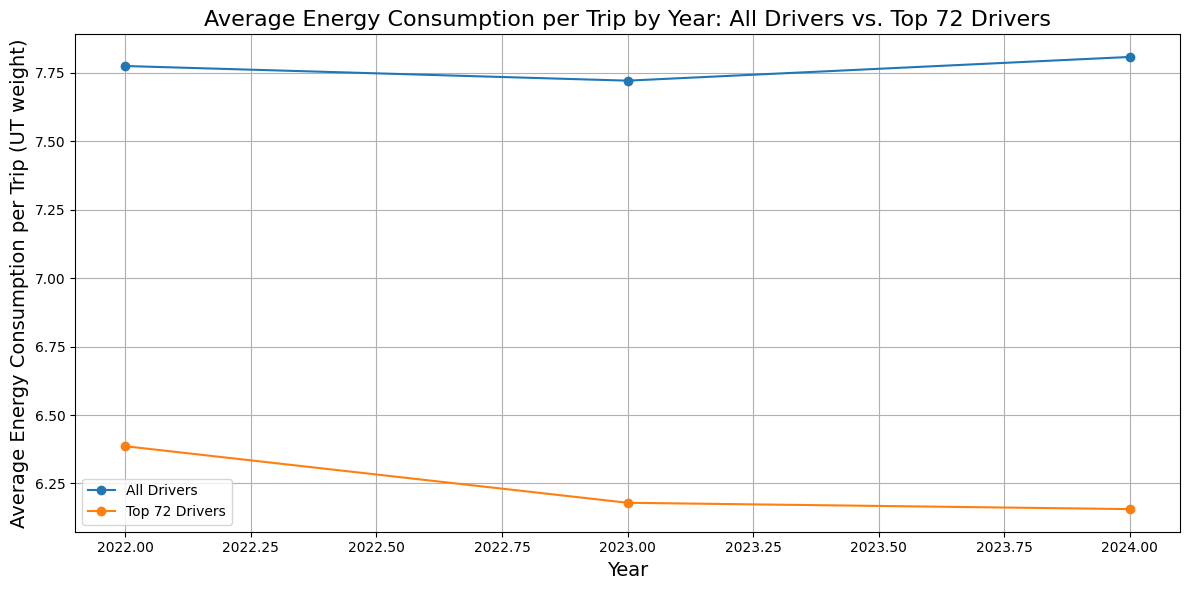


Total energy savings per trip over 3 years: 4.58 kWh
Average percentage savings per trip over 3 years: 19.67%


In [ ]:
# Merge the average energy consumption dataframes for comparison
comparison_df = pd.merge(
    average_energy_all_drivers[['year', 'avg_energy_per_trip']],
    average_energy_top_drivers[['year', 'avg_energy_per_trip']],
    on='year',
    suffixes=('_all_drivers', '_top_drivers')
)

# Calculate the difference and percentage savings
comparison_df['energy_savings_per_trip'] = comparison_df['avg_energy_per_trip_all_drivers'] - comparison_df['avg_energy_per_trip_top_drivers']
comparison_df['percentage_savings_per_trip'] = (comparison_df['energy_savings_per_trip'] / comparison_df['avg_energy_per_trip_all_drivers']) * 100

print("\nComparison of average energy consumption per trip by year:")
print(comparison_df)

# Plotting the comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(comparison_df['year'], comparison_df['avg_energy_per_trip_all_drivers'], label='All Drivers', marker='o')
plt.plot(comparison_df['year'], comparison_df['avg_energy_per_trip_top_drivers'], label='Top 72 Drivers', marker='o')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Energy Consumption per Trip (UT weight)', fontsize=14)
plt.title('Average Energy Consumption per Trip by Year: All Drivers vs. Top 72 Drivers', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate total energy savings over the 3 years
total_energy_savings_per_trip = comparison_df['energy_savings_per_trip'].sum()
total_percentage_savings_per_trip = comparison_df['percentage_savings_per_trip'].mean()

print(f"\nTotal energy savings per trip over 3 years: {total_energy_savings_per_trip:.2f} kWh")
print(f"Average percentage savings per trip over 3 years: {total_percentage_savings_per_trip:.2f}%")


Looking at the time

In [ ]:
# Calculate the total energy consumption over the 3 years for all drivers
total_energy_all_drivers_3_years = total_energy_all_drivers['net_energy_consumed_by_UT_weight'].sum()

# Calculate the total energy consumption over the 3 years for the top 72 drivers
total_energy_top_drivers_3_years = total_energy_top_drivers['net_energy_consumed_by_UT_weight'].sum()

# Calculate the savings in energy consumption
energy_savings_kwh = total_energy_all_drivers_3_years - total_energy_top_drivers_3_years

# Calculate the percentage savings
percentage_savings = (energy_savings_kwh / total_energy_all_drivers_3_years) * 100

print(f"Total energy consumption over 3 years for all drivers: {total_energy_all_drivers_3_years:.2f} kWh")
print(f"Total energy consumption over 3 years for top 72 drivers: {total_energy_top_drivers_3_years:.2f} kWh")
print(f"Energy savings over 3 years by top 72 drivers: {energy_savings_kwh:.2f} kWh")
print(f"Percentage savings over 3 years by top 72 drivers: {percentage_savings:.2f}%")


NameError: name 'total_energy_all_drivers' is not defined

   energy_per_km  energy_per_trip
0       4.063448         0.000959
1      13.391084         0.003657
2      15.948984         0.005920
3       8.971910         0.001641
4       3.214706         0.000937
  si_siv_ndriver_def  composite_score  Trip_Count  Unique_Trips  \
0               3118         0.966767        5739            52   
1               3133         0.965703       14646            52   
2               2254         0.960528        9344            52   
3               3374         0.958852        8005            89   
4               3124         0.952545       18089            52   

   energy_per_km  total_variance  
0       0.032048        0.034417  
1       0.040463        0.028130  
2       0.013290        0.065654  
3       0.014971        0.067325  
4       0.073286        0.021625  


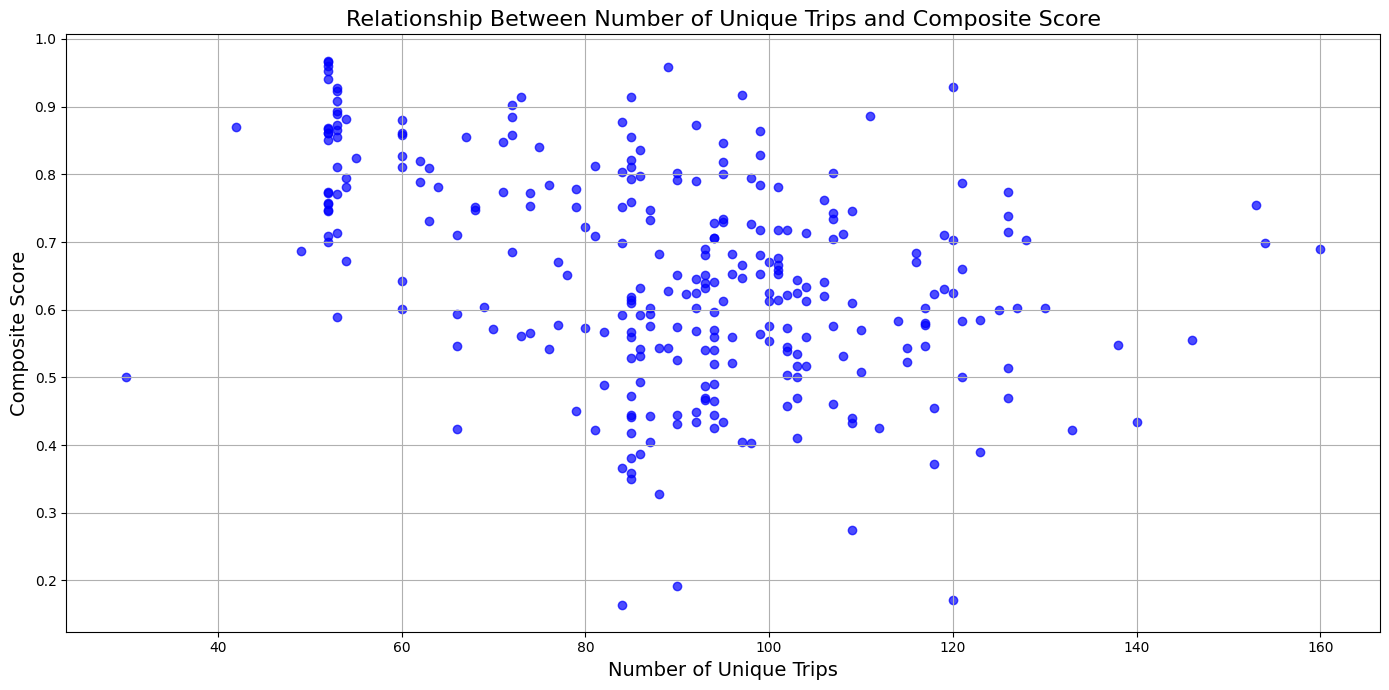

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Energy_LineApril2022to2024.csv')

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['si_siv_ndriver_def', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]

# Filter the dataset to include only these drivers
filtered_driver_ids = filtered_trip_counts['si_siv_ndriver_def']
filtered_df = df[df['si_siv_ndriver_def'].isin(filtered_driver_ids)].copy()

# Create unique trip identifiers
filtered_df['trip'] = filtered_df['current_station'].astype(str) + '-' + filtered_df['next_station'].astype(str)

# Count the number of unique trips each driver has driven
unique_trips_per_driver = filtered_df.groupby('si_siv_ndriver_def')['trip'].nunique().reset_index()
unique_trips_per_driver.columns = ['si_siv_ndriver_def', 'Unique_Trips']

# Calculate energy efficiency metrics for each driver
filtered_df['energy_per_km'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df['kilometres']
filtered_df['energy_per_trip'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df.groupby('si_siv_ndriver_def')['ut'].transform('size')

# Ensure the new columns are created
print(filtered_df[['energy_per_km', 'energy_per_trip']].head())

# Group by driver and calculate mean energy efficiency ratios
driver_efficiency_stats = filtered_df.groupby('si_siv_ndriver_def').agg({
    'energy_per_km': 'mean',
    'energy_per_trip': 'mean'
}).reset_index()

# Calculate variance for each selected energy metric
selected_energy_columns = [
    'net_energy_consumed_by_UT', 'auxiliary_energy_consumed', 'traction_energy', 
    'regenerated_traction_energy'
]
driver_energy_variance = filtered_df.groupby('si_siv_ndriver_def')[selected_energy_columns].var().reset_index()
driver_energy_variance['total_variance'] = driver_energy_variance[selected_energy_columns].sum(axis=1)

# Merge the efficiency stats, variance data, and trip counts
driver_stats = pd.merge(driver_efficiency_stats, driver_energy_variance, on='si_siv_ndriver_def')
driver_stats = pd.merge(driver_stats, filtered_trip_counts, on='si_siv_ndriver_def')
driver_stats = pd.merge(driver_stats, unique_trips_per_driver, on='si_siv_ndriver_def')

# Normalize the energy efficiency ratios and total variance
scaler = MinMaxScaler()
driver_stats[['energy_per_km', 'energy_per_trip', 'total_variance']] = scaler.fit_transform(
    driver_stats[['energy_per_km', 'energy_per_trip', 'total_variance']]
)

# Combine the normalized scores into a weighted composite score
driver_stats['composite_score'] = 0.5 * (1 - driver_stats['energy_per_km']) + 0.5 * (1 - driver_stats['total_variance'])

# Rank drivers based on the composite score
driver_stats = driver_stats.sort_values(by='composite_score', ascending=False).reset_index(drop=True)

# Display the first few rows to verify
print(driver_stats[['si_siv_ndriver_def', 'composite_score', 'Trip_Count', 'Unique_Trips', 'energy_per_km', 'total_variance']].head())

# Plotting the relationship between number of unique trips and composite score
plt.figure(figsize=(14, 7))
plt.scatter(driver_stats['Unique_Trips'], driver_stats['composite_score'], alpha=0.7, c='blue')
plt.xlabel('Number of Unique Trips', fontsize=14)
plt.ylabel('Composite Score', fontsize=14)
plt.title('Relationship Between Number of Unique Trips and Composite Score', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


  si_siv_ndriver_def  composite_score  Trip_Count  Top_10_Trip_Count  \
0               3118         0.966767        5739                0.0   
1               3133         0.965703       14646                0.0   
2               2254         0.960528        9344                0.0   
3               3374         0.958852        8005               17.0   
4               3124         0.952545       18089                0.0   

   energy_per_km  total_variance  
0       0.032048        0.034417  
1       0.040463        0.028130  
2       0.013290        0.065654  
3       0.014971        0.067325  
4       0.073286        0.021625  


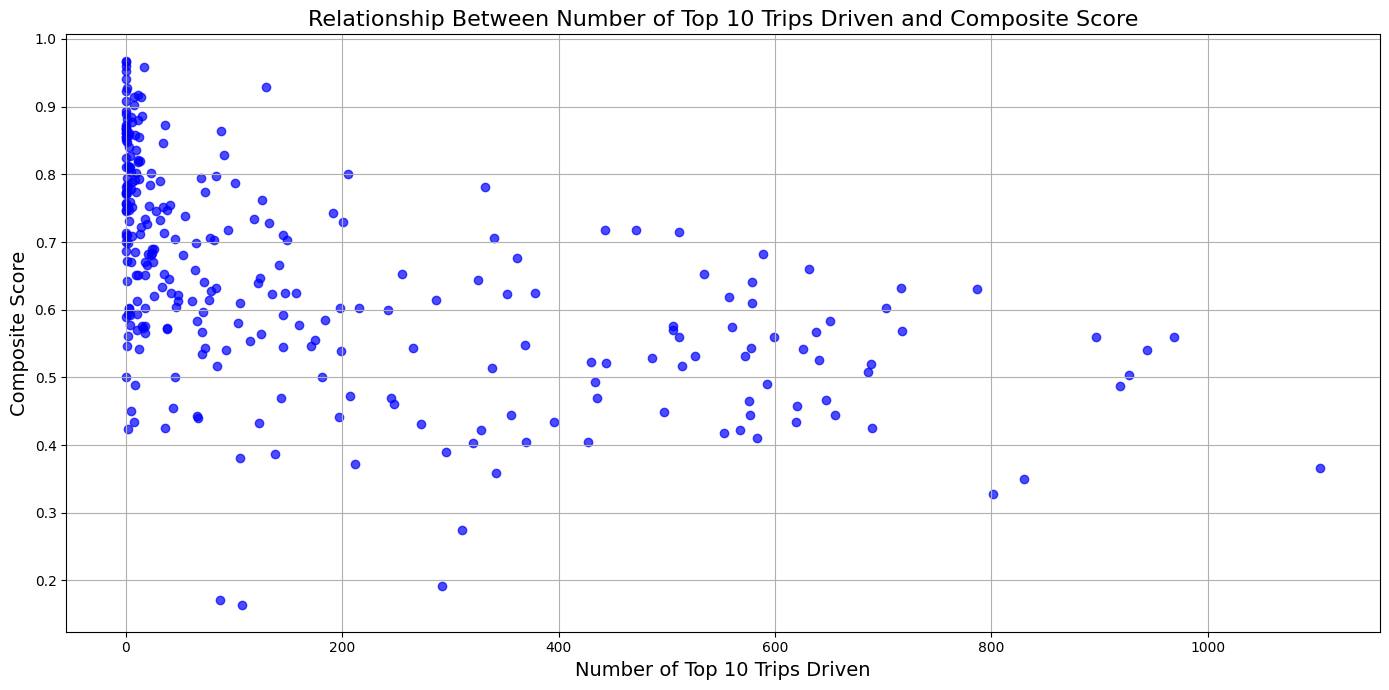

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset from CSV file
df = pd.read_csv('Energy_LineApril2022to2024.csv')

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['si_siv_ndriver_def', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]

# Filter the dataset to include only these drivers
filtered_driver_ids = filtered_trip_counts['si_siv_ndriver_def']
filtered_df = df[df['si_siv_ndriver_def'].isin(filtered_driver_ids)].copy()

# Create unique trip identifiers
filtered_df['trip'] = filtered_df['current_station'].astype(str) + '-' + filtered_df['next_station'].astype(str)

# Identify the top 10 trips by average energy consumption
top_10_trips = filtered_df.groupby('trip')['net_energy_consumed_by_UT'].mean().nlargest(10).index

# Count how many times each driver has driven these top 10 trips
top_10_trip_counts = filtered_df[filtered_df['trip'].isin(top_10_trips)].groupby('si_siv_ndriver_def')['trip'].count().reset_index()
top_10_trip_counts.columns = ['si_siv_ndriver_def', 'Top_10_Trip_Count']

# Calculate energy consumed per kilometer and per trip for each driver
filtered_df['energy_per_km'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df['kilometres']
filtered_df['energy_per_trip'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df.groupby('si_siv_ndriver_def')['ut'].transform('size')

# Calculate energy efficiency metrics for each driver
driver_efficiency_stats = filtered_df.groupby('si_siv_ndriver_def').agg({
    'energy_per_km': 'mean',
    'energy_per_trip': 'mean'
}).reset_index()

# Calculate variance for each selected energy metric
selected_energy_columns = [
    'net_energy_consumed_by_UT', 'auxiliary_energy_consumed', 'traction_energy', 
    'regenerated_traction_energy'
]
driver_energy_variance = filtered_df.groupby('si_siv_ndriver_def')[selected_energy_columns].var().reset_index()
driver_energy_variance['total_variance'] = driver_energy_variance[selected_energy_columns].sum(axis=1)

# Merge the efficiency stats, variance data, and trip counts
driver_stats = pd.merge(driver_efficiency_stats, driver_energy_variance, on='si_siv_ndriver_def')
driver_stats = pd.merge(driver_stats, filtered_trip_counts, on='si_siv_ndriver_def')
driver_stats = pd.merge(driver_stats, top_10_trip_counts, on='si_siv_ndriver_def', how='left')

# Fill NaN values in 'Top_10_Trip_Count' with 0
driver_stats['Top_10_Trip_Count'] = driver_stats['Top_10_Trip_Count'].fillna(0)

# Normalize the energy efficiency ratios and total variance
scaler = MinMaxScaler()
driver_stats[['energy_per_km', 'energy_per_trip', 'total_variance']] = scaler.fit_transform(
    driver_stats[['energy_per_km', 'energy_per_trip', 'total_variance']]
)

# Combine the normalized scores into a weighted composite score
driver_stats['composite_score'] = 0.5 * (1 - driver_stats['energy_per_km']) + 0.5 * (1 - driver_stats['total_variance'])

# Rank drivers based on the composite score
driver_stats = driver_stats.sort_values(by='composite_score', ascending=False).reset_index(drop=True)

# Display the first few rows to verify
print(driver_stats[['si_siv_ndriver_def', 'composite_score', 'Trip_Count', 'Top_10_Trip_Count', 'energy_per_km', 'total_variance']].head())

# Plotting the relationship between the number of top 10 trips driven and composite score
plt.figure(figsize=(14, 7))
plt.scatter(driver_stats['Top_10_Trip_Count'], driver_stats['composite_score'], alpha=0.7, c='blue')
plt.xlabel('Number of Top 10 Trips Driven', fontsize=14)
plt.ylabel('Composite Score', fontsize=14)
plt.title('Relationship Between Number of Top 10 Trips Driven and Composite Score', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


Data exploration to understand the impact of higher frequency of High-Energy Trips on efficiency for drivers.

Pearson correlation reveals high correlation due to extremely low p-value.

  si_siv_ndriver_def  composite_score  Trip_Count  Top_10_Trip_Count  \
0               3118         0.966767        5739                0.0   
1               3133         0.965703       14646                0.0   
2               2254         0.960528        9344                0.0   
3               3374         0.958852        8005               17.0   
4               3124         0.952545       18089                0.0   

   energy_per_km  total_variance  
0       0.032048        0.034417  
1       0.040463        0.028130  
2       0.013290        0.065654  
3       0.014971        0.067325  
4       0.073286        0.021625  
Correlation between Top 10 Trip Count and Composite Score: -0.52
P-value: 4.64e-21


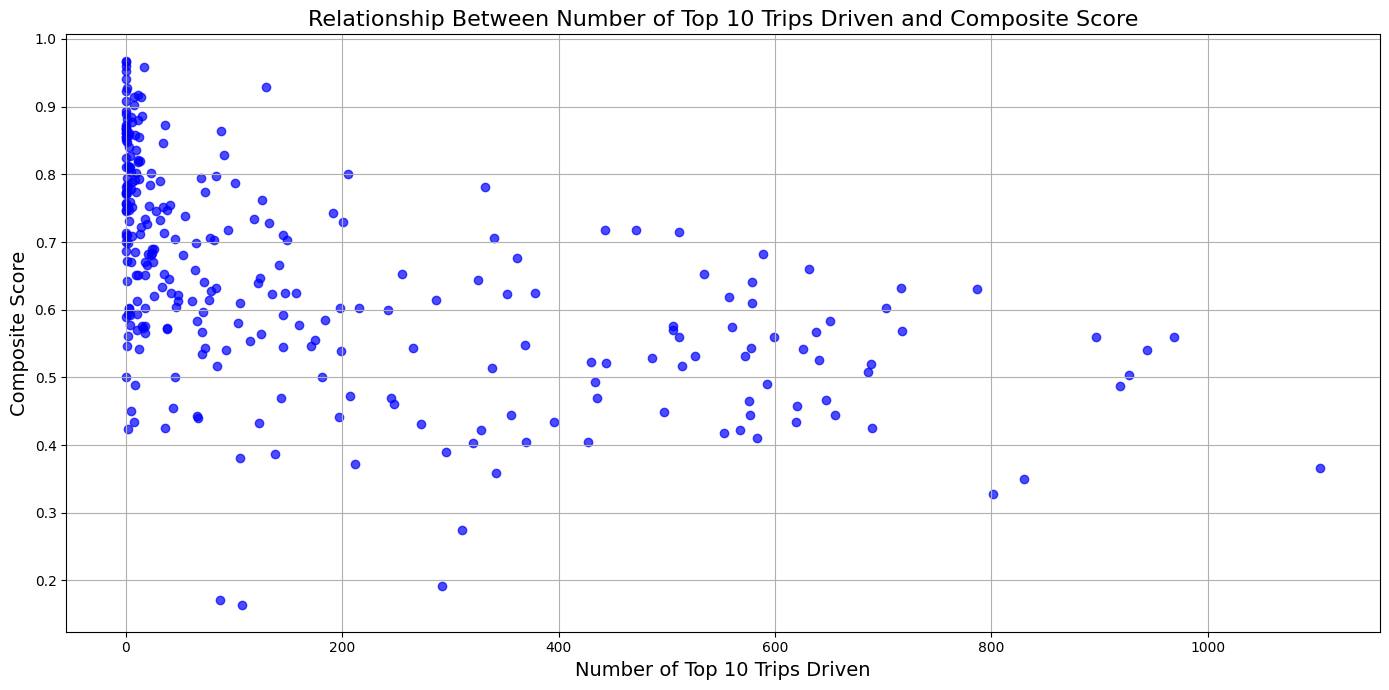

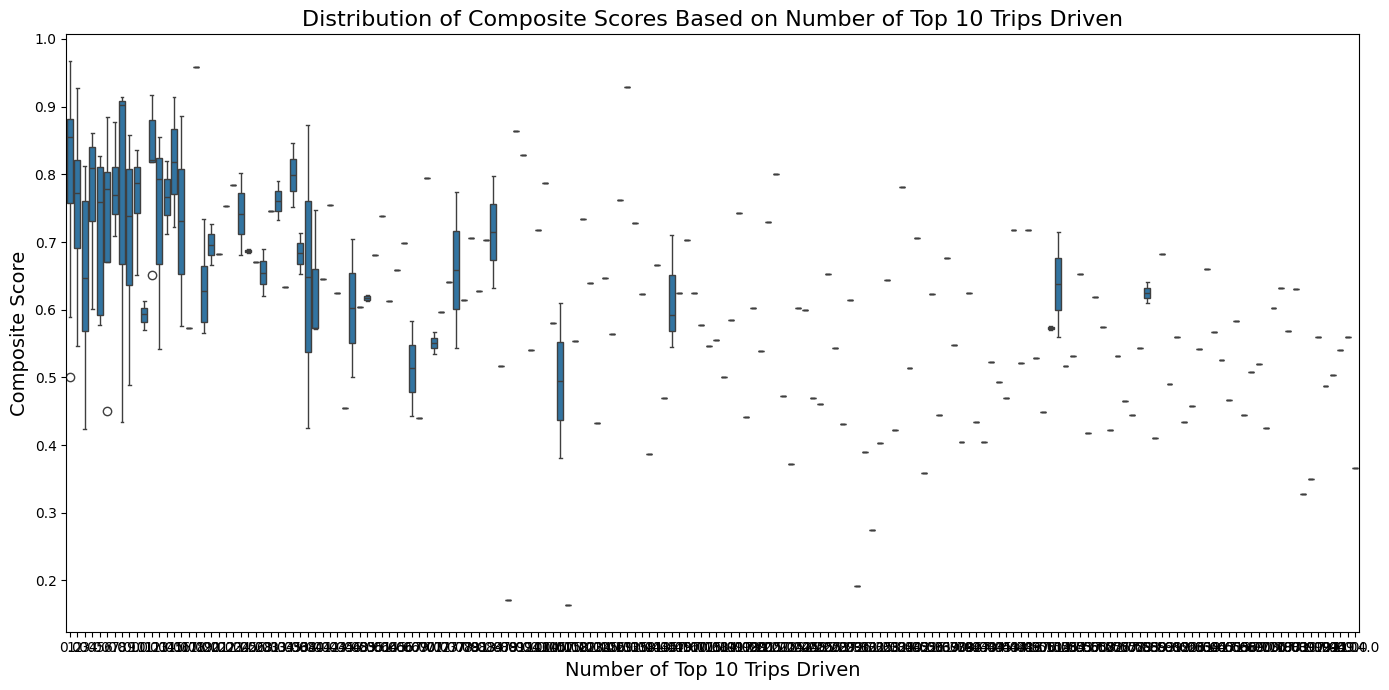

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import scipy.stats as stats

# Load the dataset from CSV file
df = pd.read_csv('Energy_LineApril2022to2024.csv')

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['si_siv_ndriver_def', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]

# Filter the dataset to include only these drivers
filtered_driver_ids = filtered_trip_counts['si_siv_ndriver_def']
filtered_df = df[df['si_siv_ndriver_def'].isin(filtered_driver_ids)].copy()

# Create unique trip identifiers
filtered_df['trip'] = filtered_df['current_station'].astype(str) + '-' + filtered_df['next_station'].astype(str)

# Identify the top 10 trips by average energy consumption
top_10_trips = filtered_df.groupby('trip')['net_energy_consumed_by_UT'].mean().nlargest(10).index

# Count how many times each driver has driven these top 10 trips
top_10_trip_counts = filtered_df[filtered_df['trip'].isin(top_10_trips)].groupby('si_siv_ndriver_def')['trip'].count().reset_index()
top_10_trip_counts.columns = ['si_siv_ndriver_def', 'Top_10_Trip_Count']

# Calculate energy consumed per kilometer and per trip for each driver
filtered_df['energy_per_km'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df['kilometres']
filtered_df['energy_per_trip'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df.groupby('si_siv_ndriver_def')['ut'].transform('size')

# Calculate energy efficiency metrics for each driver
driver_efficiency_stats = filtered_df.groupby('si_siv_ndriver_def').agg({
    'energy_per_km': 'mean',
    'energy_per_trip': 'mean'
}).reset_index()

# Calculate variance for each selected energy metric
selected_energy_columns = [
    'net_energy_consumed_by_UT', 'auxiliary_energy_consumed', 'traction_energy', 
    'regenerated_traction_energy'
]
driver_energy_variance = filtered_df.groupby('si_siv_ndriver_def')[selected_energy_columns].var().reset_index()
driver_energy_variance['total_variance'] = driver_energy_variance[selected_energy_columns].sum(axis=1)

# Merge the efficiency stats, variance data, and trip counts
driver_stats = pd.merge(driver_efficiency_stats, driver_energy_variance, on='si_siv_ndriver_def')
driver_stats = pd.merge(driver_stats, filtered_trip_counts, on='si_siv_ndriver_def')
driver_stats = pd.merge(driver_stats, top_10_trip_counts, on='si_siv_ndriver_def', how='left')

# Fill NaN values in 'Top_10_Trip_Count' with 0
driver_stats['Top_10_Trip_Count'] = driver_stats['Top_10_Trip_Count'].fillna(0)

# Normalize the energy efficiency ratios and total variance
scaler = MinMaxScaler()
driver_stats[['energy_per_km', 'energy_per_trip', 'total_variance']] = scaler.fit_transform(
    driver_stats[['energy_per_km', 'energy_per_trip', 'total_variance']]
)

# Combine the normalized scores into a weighted composite score
driver_stats['composite_score'] = 0.5 * (1 - driver_stats['energy_per_km']) + 0.5 * (1 - driver_stats['total_variance'])

# Rank drivers based on the composite score
driver_stats = driver_stats.sort_values(by='composite_score', ascending=False).reset_index(drop=True)

# Display the first few rows to verify
print(driver_stats[['si_siv_ndriver_def', 'composite_score', 'Trip_Count', 'Top_10_Trip_Count', 'energy_per_km', 'total_variance']].head())

# Calculate correlation coefficient
correlation, p_value = stats.pearsonr(driver_stats['Top_10_Trip_Count'], driver_stats['composite_score'])
print(f"Correlation between Top 10 Trip Count and Composite Score: {correlation:.2f}")
print(f"P-value: {p_value:.2e}")

# Plotting the relationship between the number of top 10 trips driven and composite score
plt.figure(figsize=(14, 7))
plt.scatter(driver_stats['Top_10_Trip_Count'], driver_stats['composite_score'], alpha=0.7, c='blue')
plt.xlabel('Number of Top 10 Trips Driven', fontsize=14)
plt.ylabel('Composite Score', fontsize=14)
plt.title('Relationship Between Number of Top 10 Trips Driven and Composite Score', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the distribution of composite scores for drivers based on the number of top 10 trips driven
plt.figure(figsize=(14, 7))
sns.boxplot(x='Top_10_Trip_Count', y='composite_score', data=driver_stats)
plt.xlabel('Number of Top 10 Trips Driven', fontsize=14)
plt.ylabel('Composite Score', fontsize=14)
plt.title('Distribution of Composite Scores Based on Number of Top 10 Trips Driven', fontsize=16)
plt.tight_layout()
plt.show()
